**Problem statement - Classify obesity levels in individuals based on diverse eating habits, physical condition and demographic information.**

# Import Data

In [1]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Set working directory
%cd /content/drive/MyDrive/Data Mining/

/content/drive/MyDrive/Data Mining


In [3]:
# Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Getting data using read_csv
df_obesity = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

Column definitions

Total no. of columns = 17

Gender-----------------------------Gender

Age--------------------------------Age

Height-----------------------------Height

Weight-----------------------------Weight

Family_history_with_overweight-----Family_history_with_overweight

FAVC-------------------------------Frequent consumption of high calorie food

FCVC-------------------------------Frequent consumption of vegetables

NCP--------------------------------Number of main meals

CAEC-------------------------------Consumption of food between meals

Smoke------------------------------Smoke

CH2O-------------------------------Consumption of water daily

SCC--------------------------------Calorie_Consump_Monitoring

FAF--------------------------------Physical activity frequency

TUE--------------------------------Time using technology devices

CALC-------------------------------Consumption of alcohol

MTRANS-----------------------------Transportation used

NObeyesdad-------------------------Obesity_level

In [5]:
# Displaying first five rows
df_obesity.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [6]:
# Displaying last five rows
df_obesity.tail()

Gender        Age    Height      Weight family_history_with_overweight  \
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O SCC       FAF       TUE  \
2106  yes   3.0  3.0  Sometimes    no  1.728139  no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130  no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193  no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339  no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513  no  1.026452  0.714137   

           CALC                 MTRANS        NObeyesdad  
2106  Sometimes  Public_Transportation  Obesity_Type_III  
2107  Sometimes  Public_Transportation  Obesity_Type_III  
2108  Sometimes  Public_Transportation  Obesity_Type_III  
2109  Sometimes  Public_Transportation  Obesity_Type_III  
2110  Sometimes  Public_Transportation  Obesity_Type_III

# EDA

In [7]:
# Dimensions of dataframe
df_obesity.shape

(2111, 17)

In [8]:
# Elements in dataframe
df_obesity.size

35887

In [9]:
# Summary of dataframe
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [10]:
# Statistical insights of numerical columns
df_obesity.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

In [11]:
#rename target variable
df_obesity.rename(columns={'NObeyesdad':'Obesity_level'}, inplace=True)

In [12]:
df_obesity['Gender'].value_counts()

Gender
Male      1068
Female    1043
Name: count, dtype: int64

In [13]:
df_obesity['family_history_with_overweight'].value_counts()

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

In [14]:
#Frequent consumption of high calorie food
df_obesity['FAVC'].value_counts()

FAVC
yes    1866
no      245
Name: count, dtype: int64

In [15]:
#Consumption of food between meals
df_obesity['CAEC'].value_counts()

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

In [16]:
df_obesity['SMOKE'].value_counts()

SMOKE
no     2067
yes      44
Name: count, dtype: int64

In [17]:
#Calorie_Consumption_Monitoring
df_obesity['SCC'].value_counts()

SCC
no     2015
yes      96
Name: count, dtype: int64

In [18]:
#Consumption of Alcohol
df_obesity['CALC'].value_counts()

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

In [19]:
#Transportation used
df_obesity['MTRANS'].value_counts()

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [20]:
#Obesity level
df_obesity['Obesity_level'].value_counts()

Obesity_level
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [21]:
df_obesity.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS        Obesity_level  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

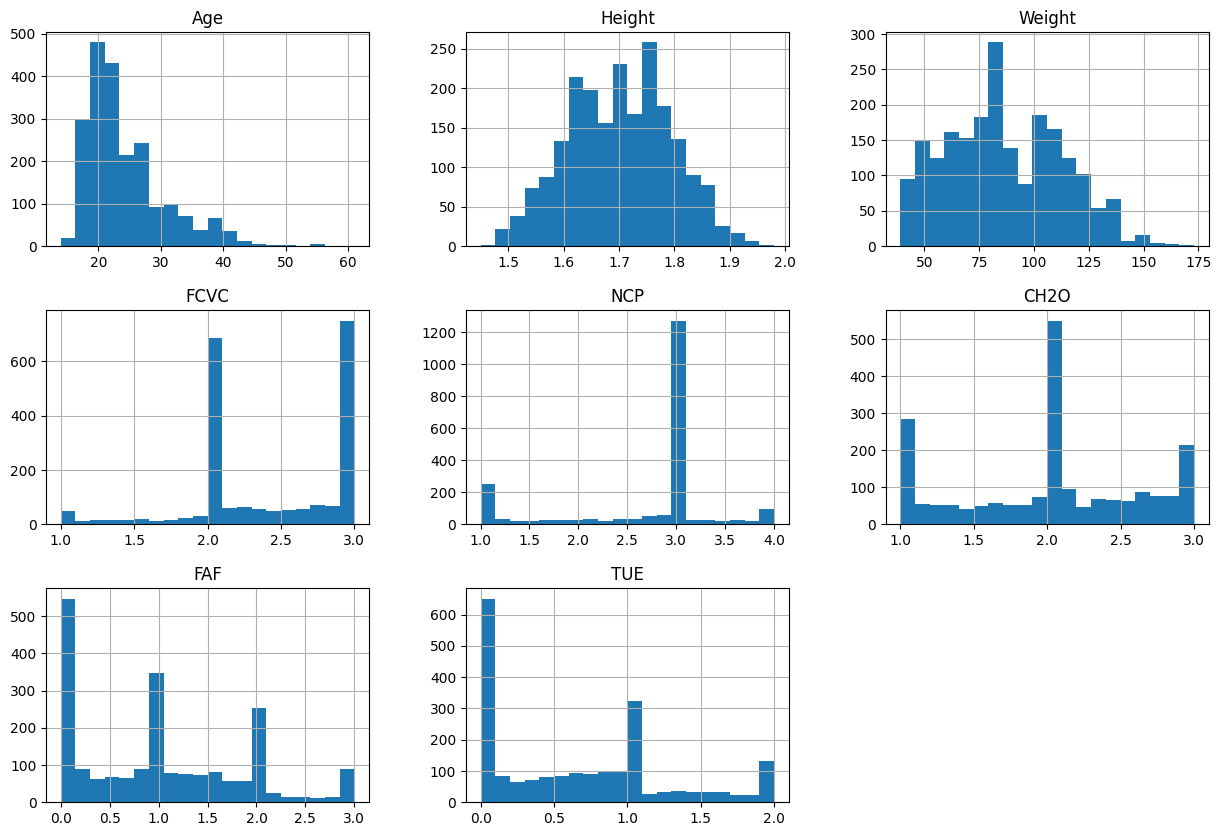

In [22]:
# Plotting histogram
df_obesity.hist(figsize=(15,10), bins=20)
plt.show()

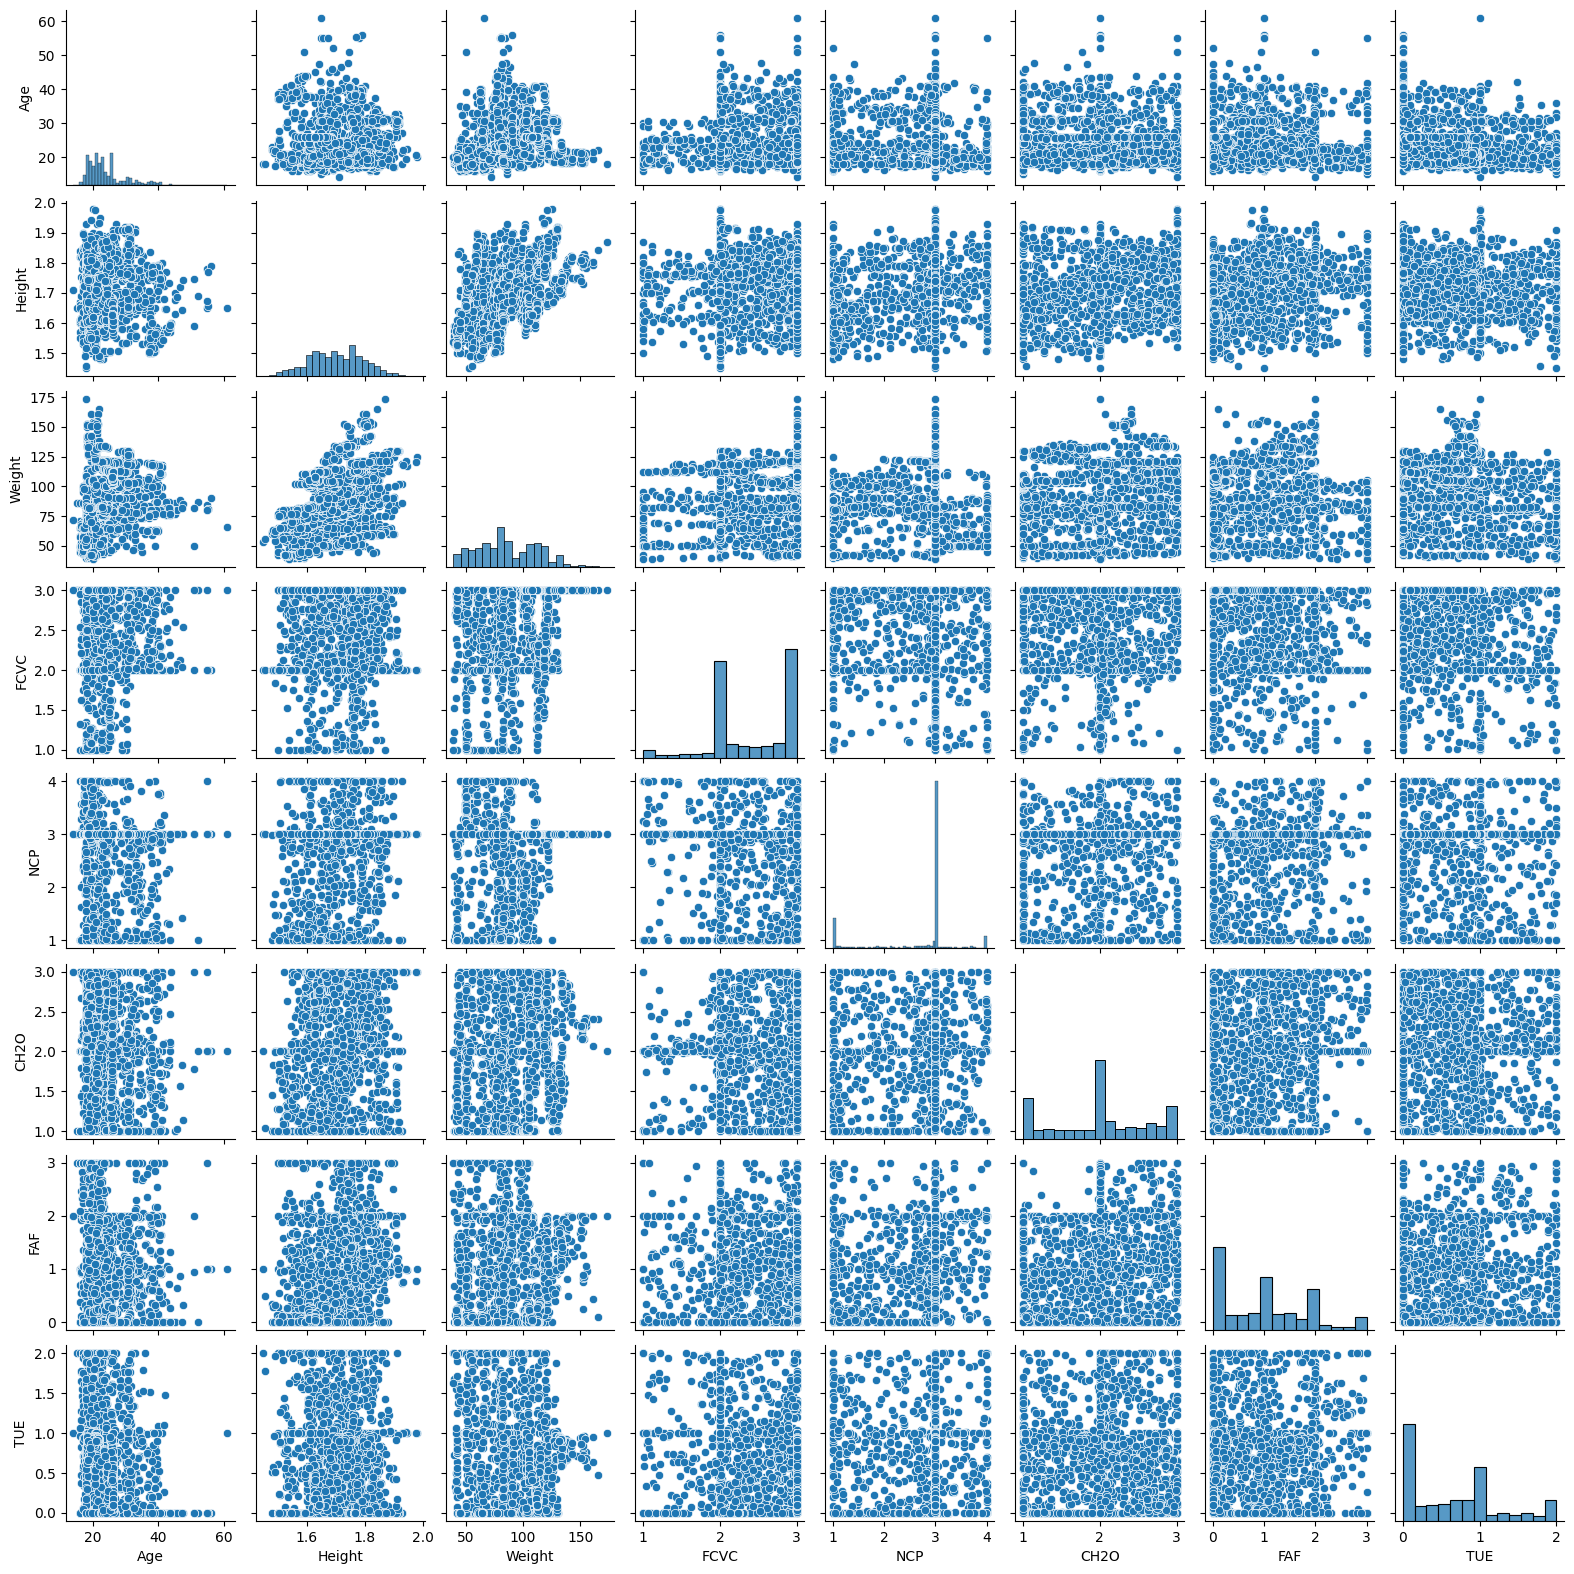

In [23]:
# Pairwise relationships in a dataset
sns.pairplot(df_obesity, height=2)
plt.show()

As we can see, there is no visible correlation among features which indicates that all features are equally important.

In [24]:
#Fetch only numerical columns for correlation matrix
number_df  = df_obesity.select_dtypes(include=['number'])
number_df.corr()

Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.025958  0.202560  0.016291 -0.043944 -0.045304 -0.144938   
Height -0.025958  1.000000  0.463136 -0.038121  0.243672  0.213376  0.294709   
Weight  0.202560  0.463136  1.000000  0.216125  0.107469  0.200575 -0.051436   
FCVC    0.016291 -0.038121  0.216125  1.000000  0.042216  0.068461  0.019939   
NCP    -0.043944  0.243672  0.107469  0.042216  1.000000  0.057088  0.129504   
CH2O   -0.045304  0.213376  0.200575  0.068461  0.057088  1.000000  0.167236   
FAF    -0.144938  0.294709 -0.051436  0.019939  0.129504  0.167236  1.000000   
TUE    -0.296931  0.051912 -0.071561 -0.101135  0.036326  0.011965  0.058562   

             TUE  
Age    -0.296931  
Height  0.051912  
Weight -0.071561  
FCVC   -0.101135  
NCP     0.036326  
CH2O    0.011965  
FAF     0.058562  
TUE     1.000000

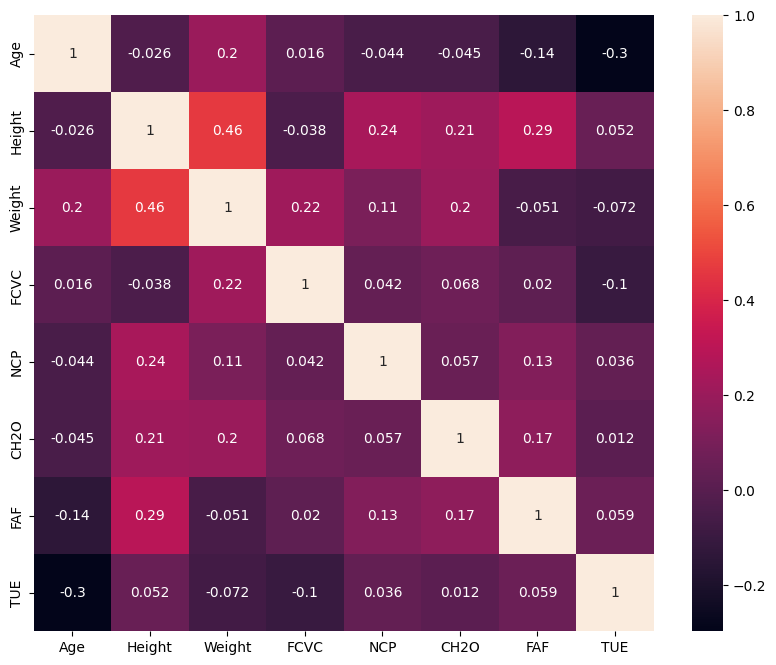

In [25]:
# Heatmap of correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(number_df.corr(), annot=True)
plt.show()

We see that only height and weight has moderate correation. So, at this point, we will keep all the features.

In [26]:
# Checking for not available values
df_obesity.isna().any()

Gender                            False
Age                               False
Height                            False
Weight                            False
family_history_with_overweight    False
FAVC                              False
FCVC                              False
NCP                               False
CAEC                              False
SMOKE                             False
CH2O                              False
SCC                               False
FAF                               False
TUE                               False
CALC                              False
MTRANS                            False
Obesity_level                     False
dtype: bool

In [27]:
# Checking for null values
df_obesity.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
Obesity_level                     0
dtype: int64

## Boxplot

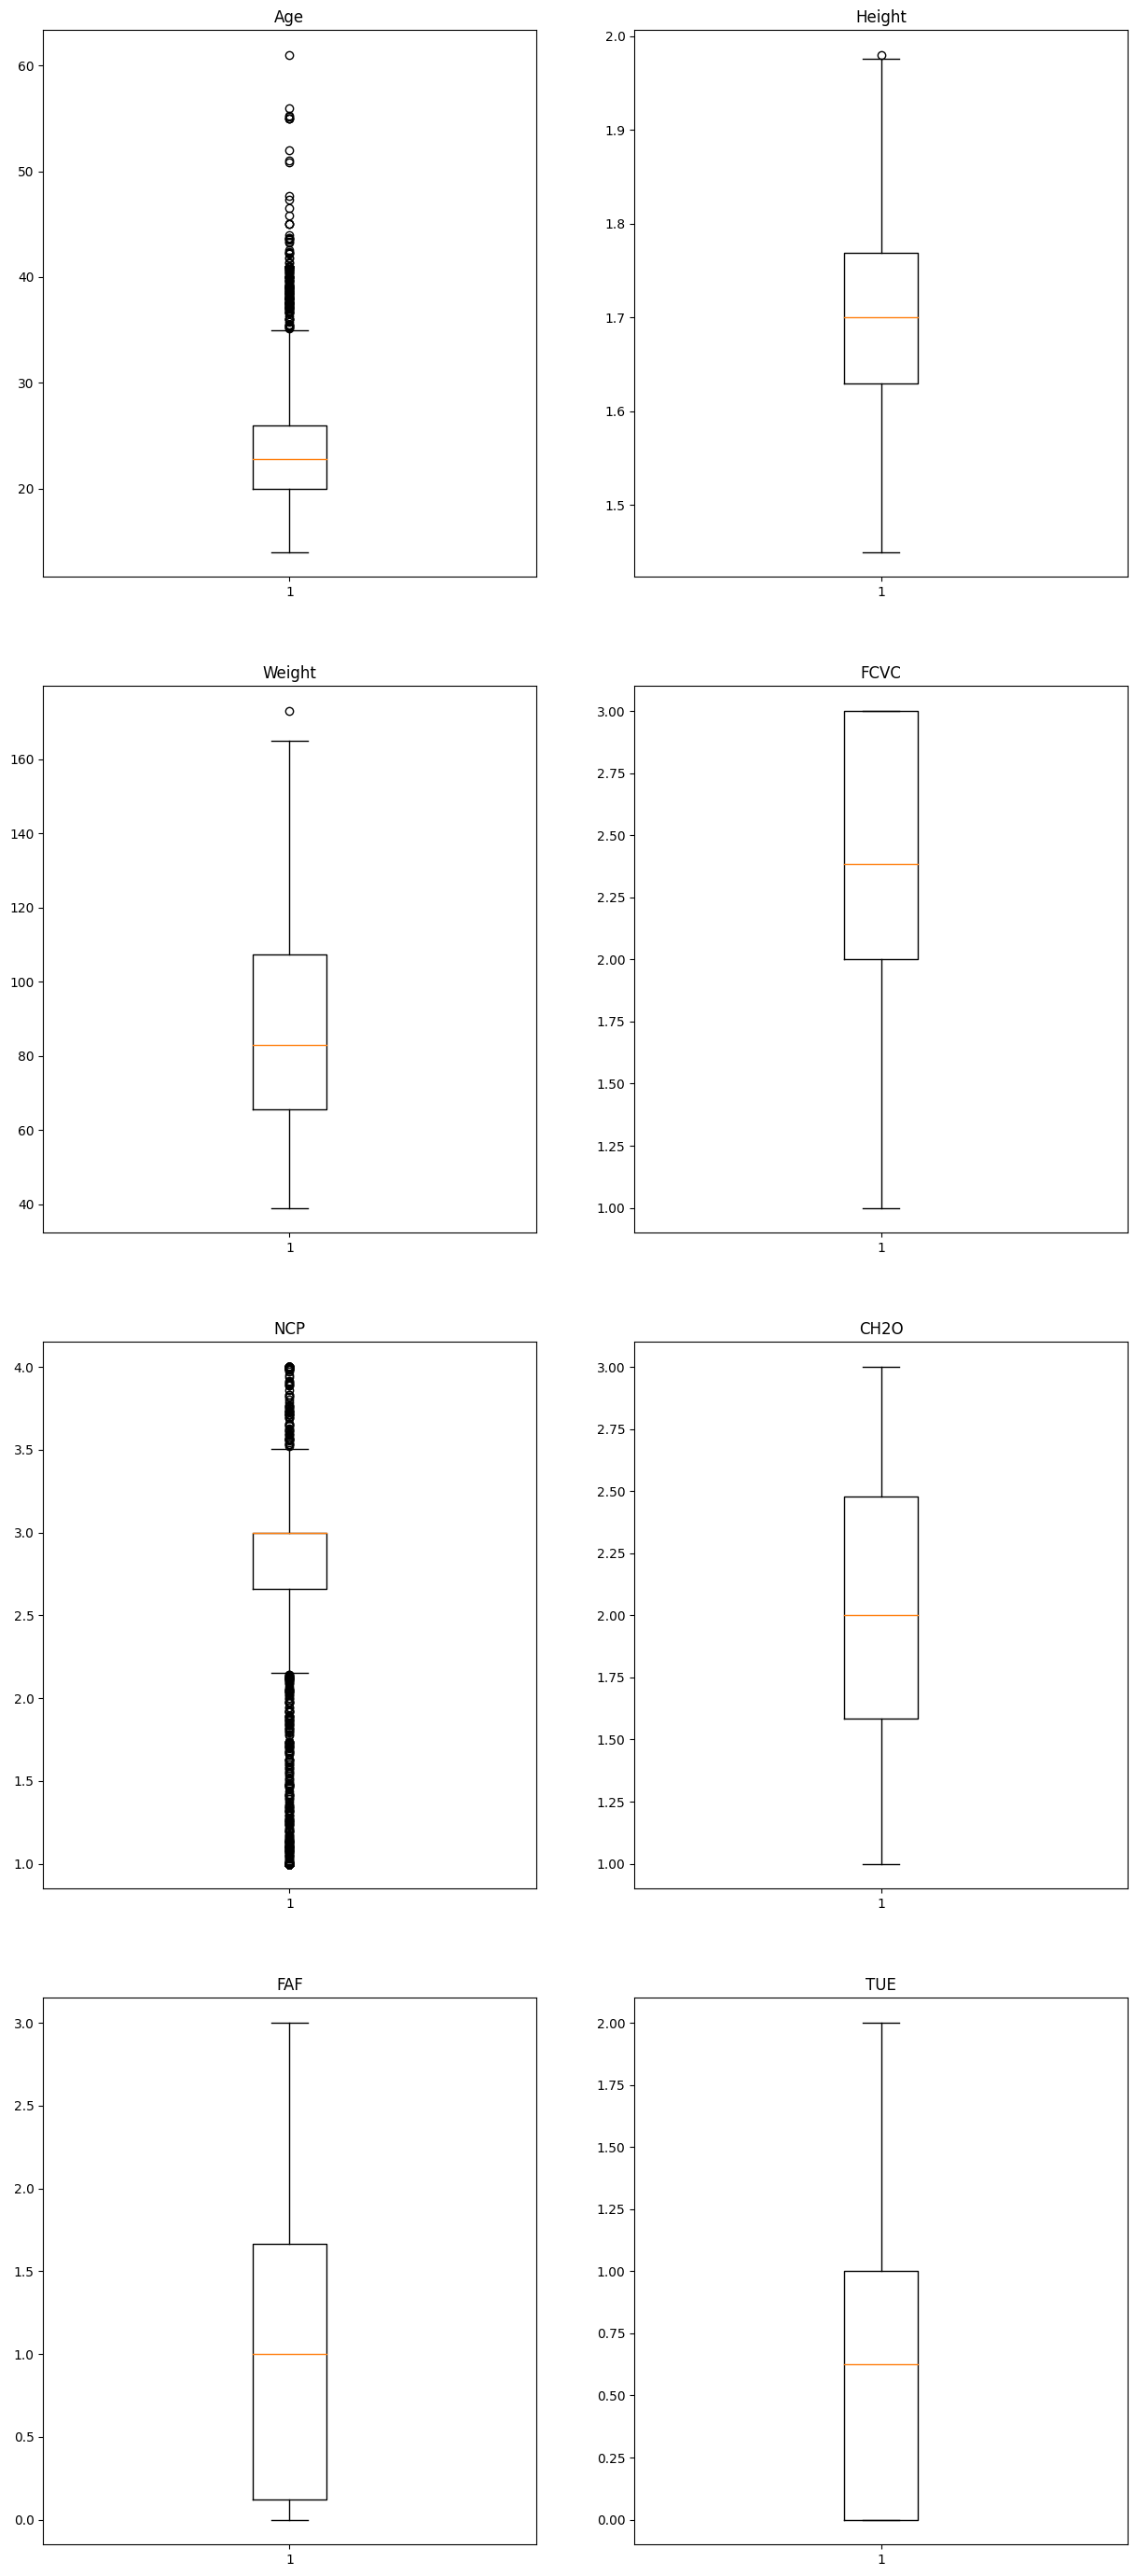

In [28]:
# Box plot
plt.figure(figsize=(15,35))
plt.subplot(4,2,1)
plt.boxplot(df_obesity.Age)
plt.title('Age')
plt.subplot(4,2,2)
plt.boxplot(df_obesity.Height)
plt.title('Height')
plt.subplot(4,2,3)
plt.boxplot(df_obesity.Weight)
plt.title('Weight')
plt.subplot(4,2,4)
plt.boxplot(df_obesity.FCVC)
plt.title('FCVC')
plt.subplot(4,2,5)
plt.boxplot(df_obesity.NCP)
plt.title('NCP')
plt.subplot(4,2,6)
plt.boxplot(df_obesity.CH2O)
plt.title('CH2O')
plt.subplot(4,2,7)
plt.boxplot(df_obesity.FAF)
plt.title('FAF')
plt.subplot(4,2,8)
plt.boxplot(df_obesity.TUE)
plt.title('TUE')
plt.show()

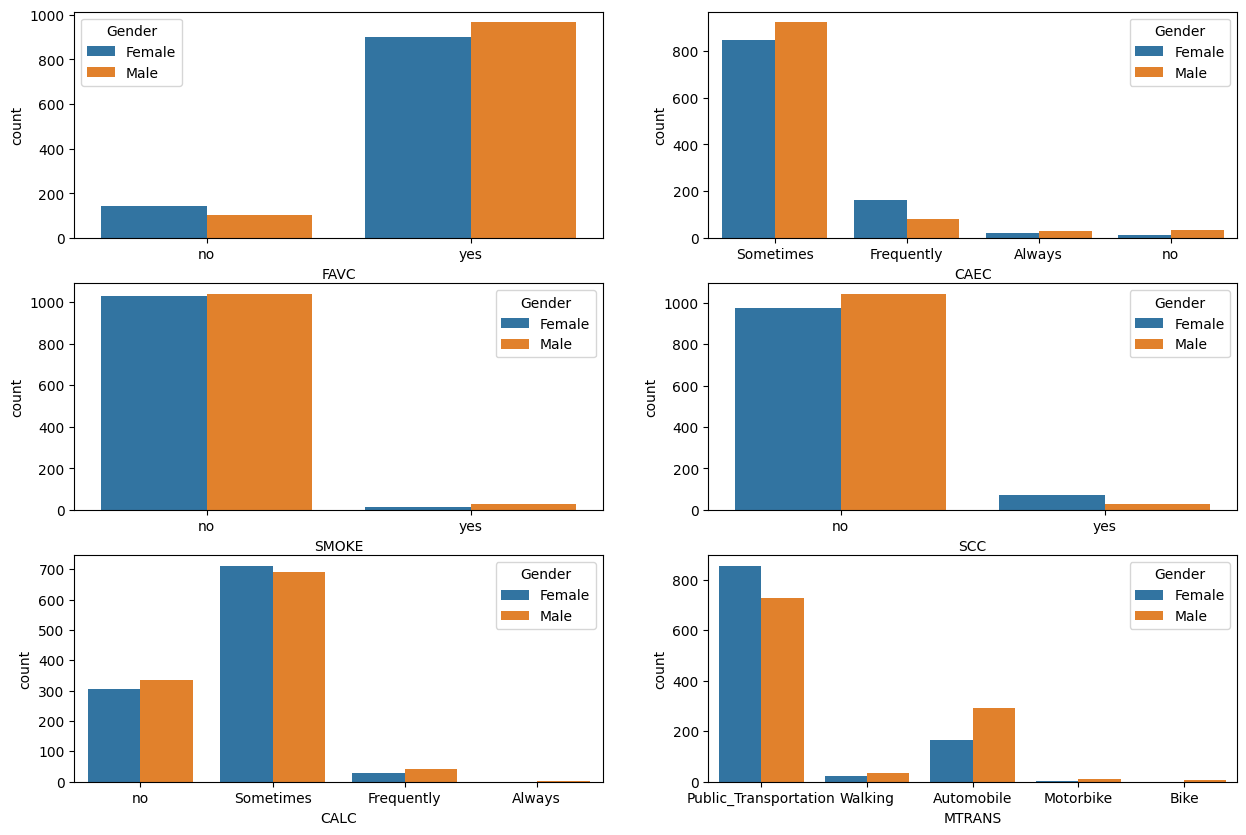

In [29]:
# Countplot for catagorical atributes
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sns.countplot(data= df_obesity, x ='FAVC',hue='Gender')
plt.subplot(3,2,2)
sns.countplot(data= df_obesity, x ='CAEC',hue='Gender')
plt.subplot(3,2,3)
sns.countplot(data= df_obesity, x ='SMOKE',hue='Gender')
plt.subplot(3,2,4)
sns.countplot(data= df_obesity, x ='SCC',hue='Gender')
plt.subplot(3,2,5)
sns.countplot(data= df_obesity, x ='CALC',hue='Gender')
plt.subplot(3,2,6)
sns.countplot(data= df_obesity, x ='MTRANS',hue='Gender')
plt.show()

## Scatterplot

Correlation between Target variable (Obesity level) and Age/Physical Activity

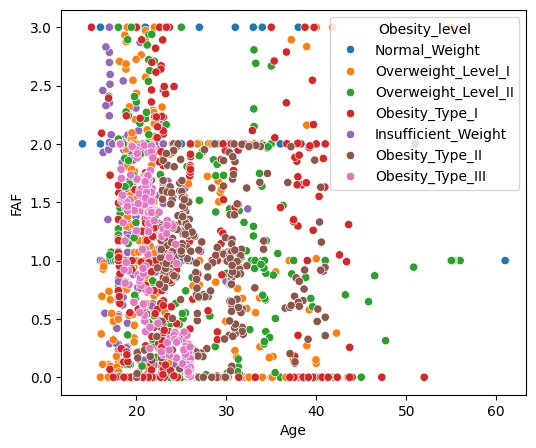

In [30]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Age', y='FAF',data=df_obesity, hue = 'Obesity_level')
plt.show()

Correlation between Target variable (Obesity level) and Height/Weight

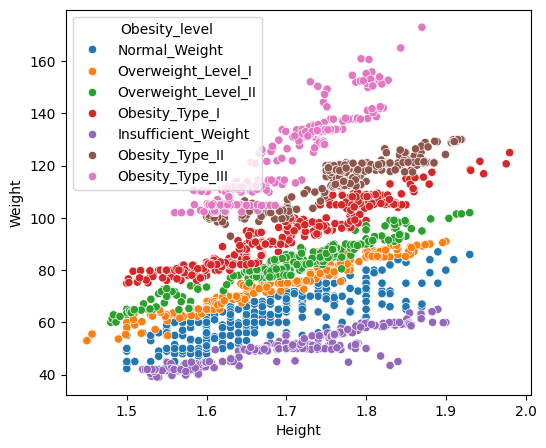

In [31]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Height', y='Weight',data=df_obesity, hue = 'Obesity_level')
plt.show()

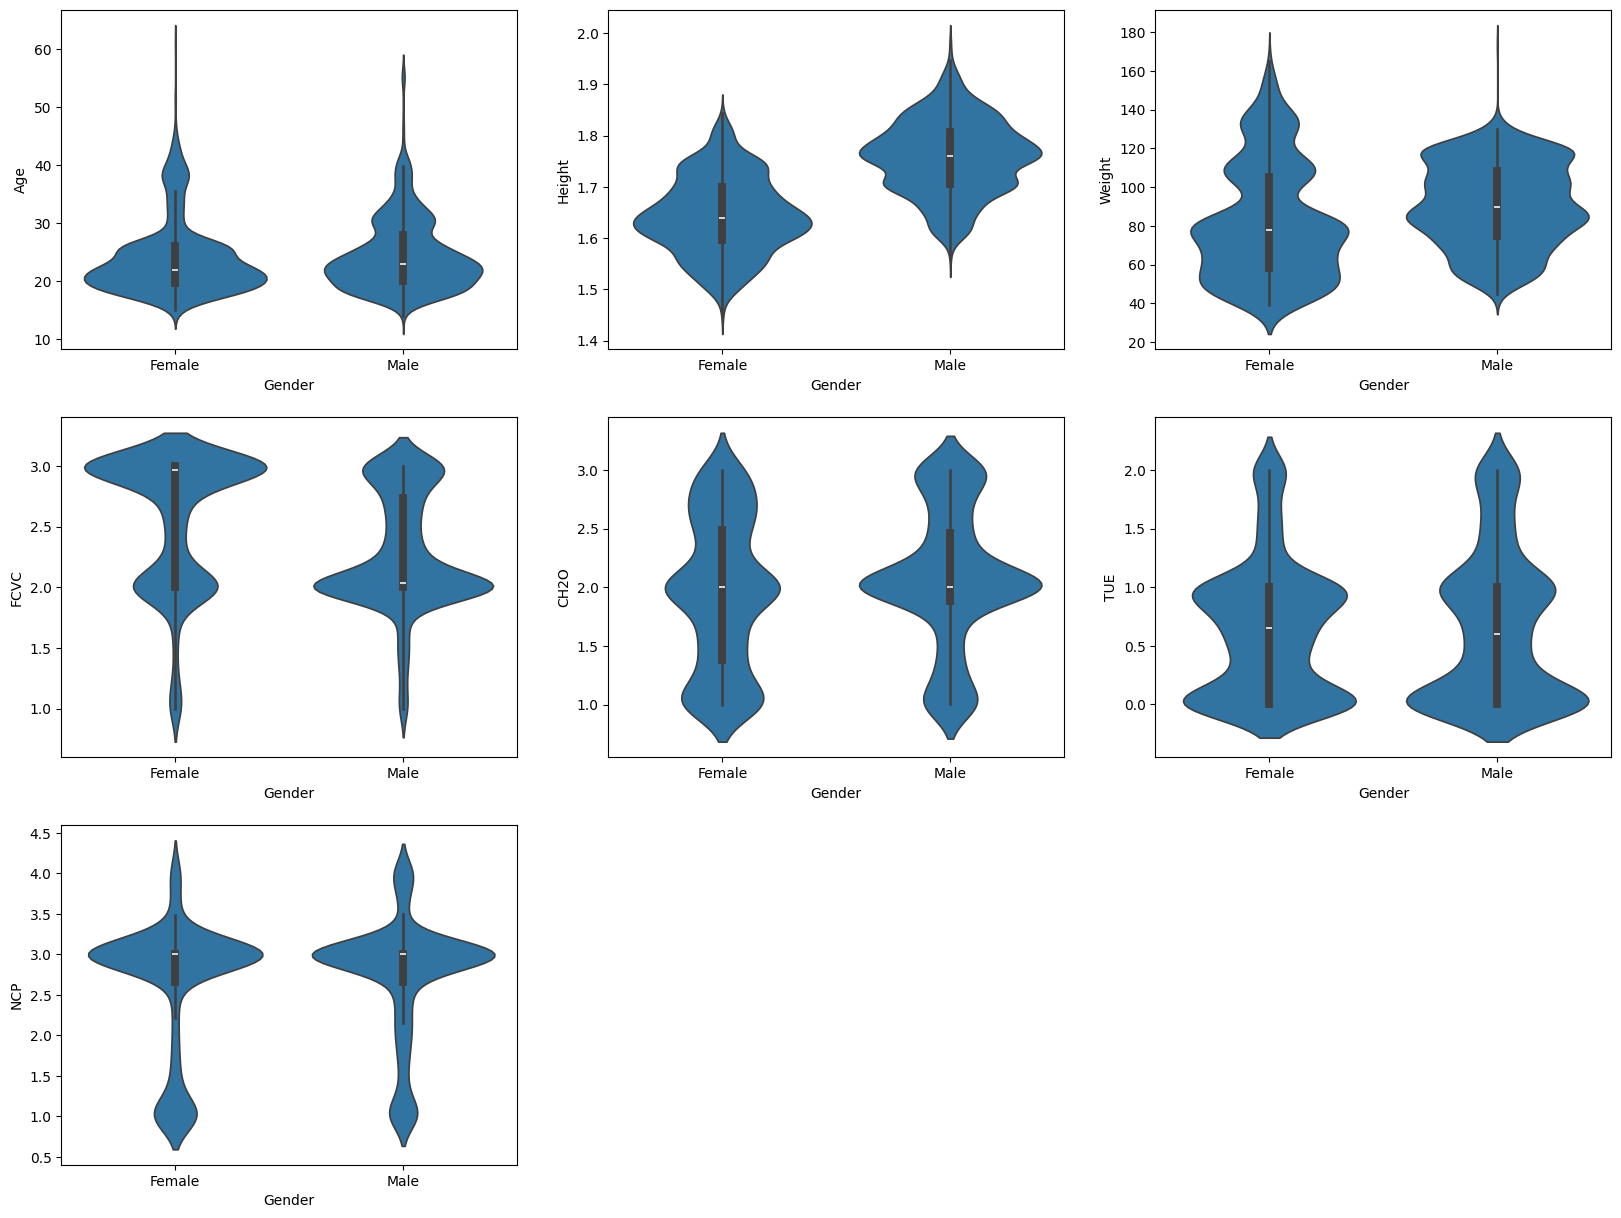

In [32]:
# kernel density estimation of continuous variable.
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.violinplot(x='Gender', y='Age', data=df_obesity)
plt.subplot(3,3,2)
sns.violinplot(x='Gender', y='Height', data=df_obesity)
plt.subplot(3,3,3)
sns.violinplot(x='Gender', y='Weight', data=df_obesity)
plt.subplot(3,3,4)
sns.violinplot(x='Gender', y='FCVC', data=df_obesity)
plt.subplot(3,3,5)
sns.violinplot(x='Gender', y='CH2O', data=df_obesity)
plt.subplot(3,3,6)
sns.violinplot(x='Gender', y='TUE', data=df_obesity)
plt.subplot(3,3,7)
sns.violinplot(x='Gender', y='NCP', data=df_obesity)
plt.show()

<ipython-input-33-d1e77c78df96>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_obesity['Age'])
<ipython-input-33-d1e77c78df96>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_obesity['Height'])
<ipython-input-33-d1e77c78df96>:8: UserWarning: 

`distplot` is a deprecated function and wil

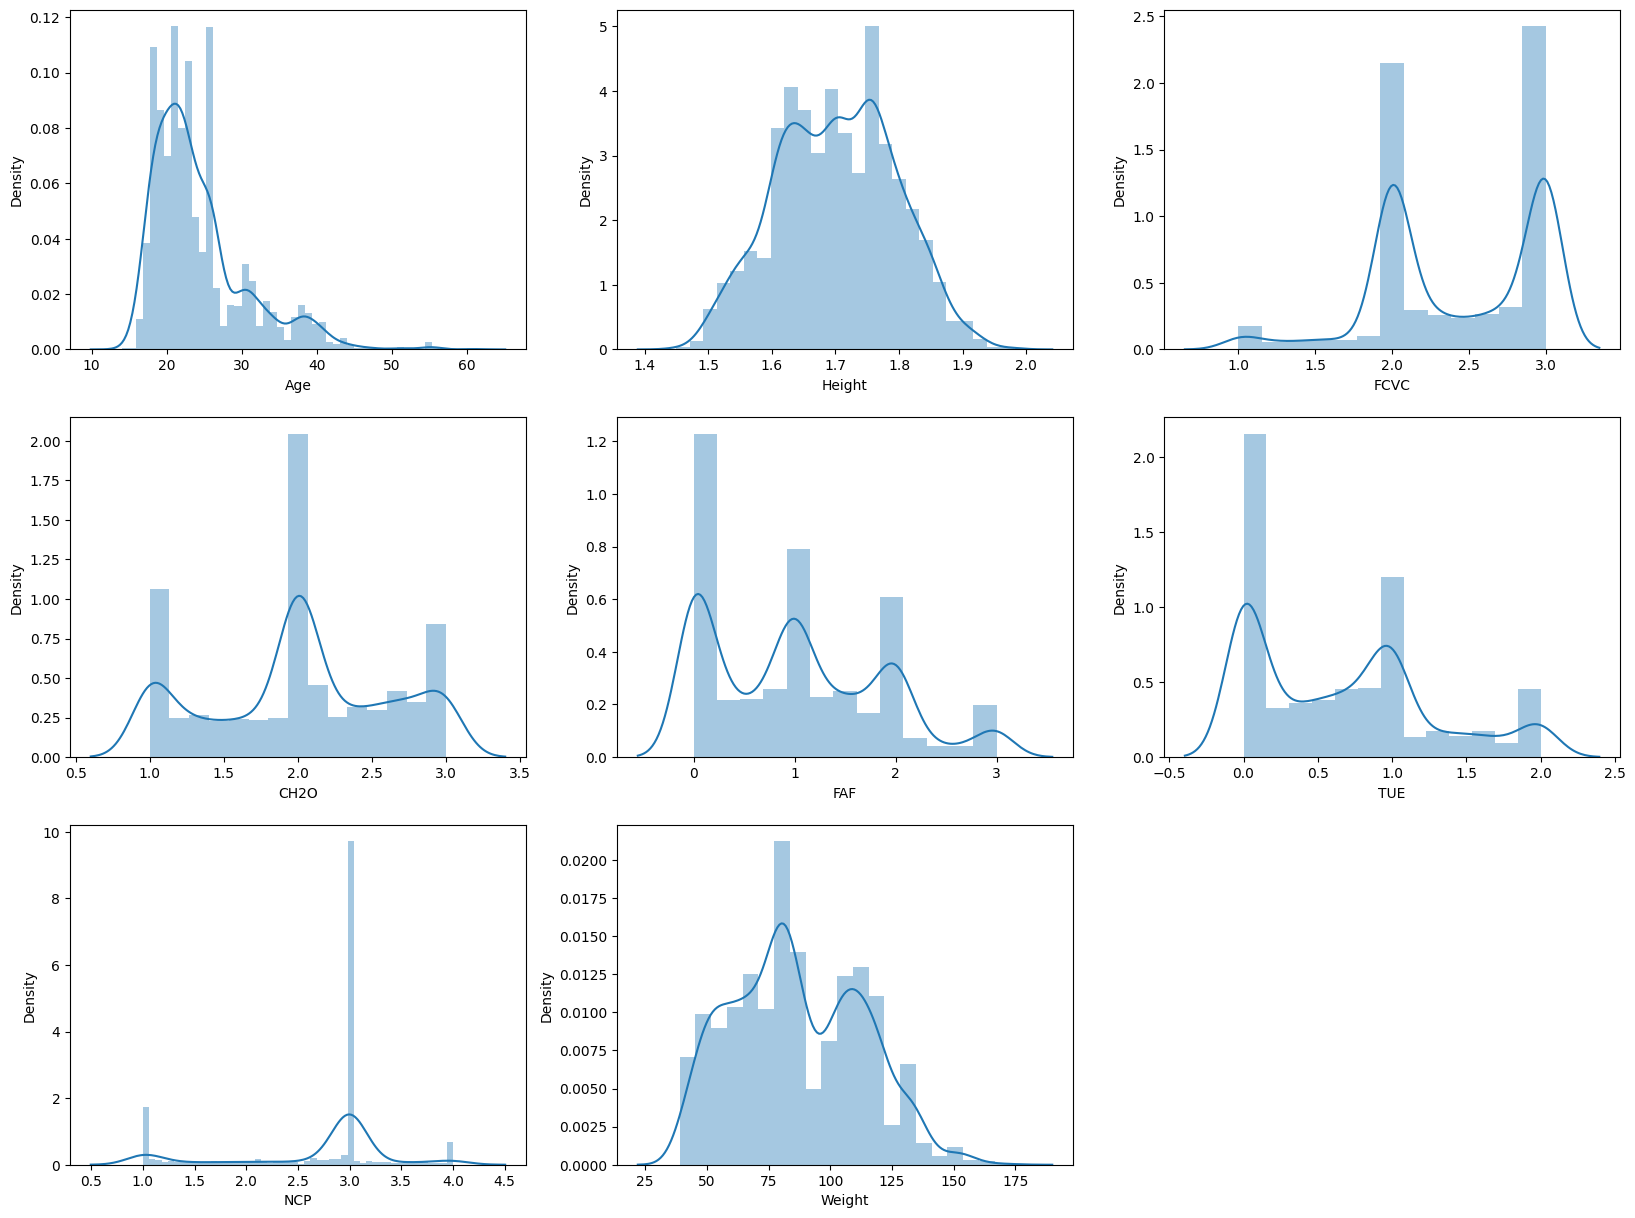

In [33]:
# Distribution plot
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.distplot(df_obesity['Age'])
plt.subplot(3,3,2)
sns.distplot(df_obesity['Height'])
plt.subplot(3,3,3)
sns.distplot(df_obesity['FCVC'])
plt.subplot(3,3,4)
sns.distplot(df_obesity['CH2O'])
plt.subplot(3,3,5)
sns.distplot(df_obesity['FAF'])
plt.subplot(3,3,6)
sns.distplot(df_obesity['TUE'])
plt.subplot(3,3,7)
sns.distplot(df_obesity['NCP'])
plt.subplot(3,3,8)
sns.distplot(df_obesity['Weight'])
plt.show()

#Pre Processing

## Handling missing values

In [34]:
# check if there are any missing or null values left
df_obesity[df_obesity.isnull().any(axis=1)].head()

Empty DataFrame
Columns: [Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, Obesity_level]
Index: []

In [35]:
df_obesity.dropna(inplace=True)

In [36]:
# Check for any remaining duplicates values
df_obesity.duplicated().any()

True

The dataset contains duplicate records. But we are not dropping any records here as the dataset is a synthetic dataset which was meant to increase datasize for specific classes.

## Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_obesity[df_obesity.select_dtypes(include=['int','float']).columns] = scaler.fit_transform(df_obesity[df_obesity.select_dtypes(include=['int','float']).columns])  # Selecting only numerical features
df_obesity.head()

Gender       Age    Height    Weight family_history_with_overweight FAVC  \
0  Female -0.522124 -0.875589 -0.862558                            yes   no   
1  Female -0.522124 -1.947599 -1.168077                            yes   no   
2    Male -0.206889  1.054029 -0.366090                            yes   no   
3    Male  0.423582  1.054029  0.015808                             no   no   
4    Male -0.364507  0.839627  0.122740                             no   no   

       FCVC       NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0 -0.785019  0.404153  Sometimes    no -0.013073   no -1.188039  0.561997   
1  1.088342  0.404153  Sometimes   yes  1.618759  yes  2.339750 -1.080625   
2 -0.785019  0.404153  Sometimes    no -0.013073   no  1.163820  0.561997   
3  1.088342  0.404153  Sometimes    no -0.013073   no  1.163820 -1.080625   
4 -0.785019 -2.167023  Sometimes    no -0.013073   no -1.188039 -1.080625   

         CALC                 MTRANS        Obesity_level  
0          no  Public_Transportation        Normal_Weight  
1   Sometimes  Public_Transportation        Normal_Weight  
2  Frequently  Public_Transportation        Normal_Weight  
3  Frequently                Walking   Overweight_Level_I  
4   Sometimes  Public_Transportation  Overweight_Level_II

In [38]:
#see the scaled columns
scaled = pd.DataFrame(df_obesity[df_obesity.select_dtypes(include=['int','float']).columns])
scaled.columns = list(df_obesity.select_dtypes(include=['int','float']).columns)

The data is scaled to have 0 mean and 1 standard deviation.

In [39]:
df_obesity['Gender'], c =pd.factorize(df_obesity['Gender'])
df_obesity['family_history_with_overweight'], c = pd.factorize(df_obesity['family_history_with_overweight'])
df_obesity['FAVC'], c = pd.factorize(df_obesity['FAVC'])
df_obesity['SMOKE'], c = pd.factorize(df_obesity['SMOKE'])
df_obesity['SCC'], c = pd.factorize(df_obesity['SCC'])
df_obesity['CAEC'], c = pd.factorize(df_obesity['CAEC'])
df_obesity['CALC'], c = pd.factorize(df_obesity['CALC'])
df_obesity['MTRANS'], c = pd.factorize(df_obesity['MTRANS'])

In [40]:
df_obesity.tail()

Gender       Age    Height    Weight  family_history_with_overweight  \
2106       0 -0.525774  0.097045  1.711763                               0   
2107       0 -0.367195  0.502844  1.800914                               0   
2108       0 -0.281909  0.541672  1.798868                               0   
2109       0  0.007776  0.404927  1.785780                               0   
2110       0 -0.102119  0.398344  1.790592                               0   

      FAVC      FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF  \
2106     1  1.088342  0.404153     0      0 -0.456705    0  0.783135   
2107     1  1.088342  0.404153     0      0 -0.004702    0  0.389341   
2108     1  1.088342  0.404153     0      0  0.075361    0  0.474971   
2109     1  1.088342  0.404153     0      0  1.377801    0  0.151471   
2110     1  1.088342  0.404153     0      0  1.396035    0  0.018996   

           TUE  CALC  MTRANS     Obesity_level  
2106  0.407996     1       0  Obesity_Type_III  
2107 -0.096251     1       0  Obesity_Type_III  
2108 -0.019018     1       0  Obesity_Type_III  
2109 -0.117991     1       0  Obesity_Type_III  
2110  0.092432     1       0  Obesity_Type_III

All categorical variables are encoded.

# Generate Train Test Split

In this part, we are splitting our dataset into Train and Test set. As our dataset is Synthetic dataset generated by SMOTE, we are also creating an imbalanced dataset to test the realtime scenarios.

# Balance Dataset : Train Test Split

In [41]:
# Divide dataframe into X and y.
# X -----> Independant features
# y -----> Target feature

X = df_obesity.iloc[:,:-1]
y = df_obesity['Obesity_level']

# Balanced Dataset : Feature Selection

In [42]:
# Performing feature selection using Decision Tree
from sklearn.tree import DecisionTreeClassifier
FS_dt = DecisionTreeClassifier(max_depth=10).fit(X, y)

In [43]:
# Creating a dataframe of feature_importances_
feature_select = pd.DataFrame()
feature_select['Features'] = X.columns
feature_select['feature_importances_'] = FS_dt.feature_importances_
feature_select.sort_values(by='feature_importances_', ascending=False)

Features  feature_importances_
3                           Weight              0.485869
2                           Height              0.228111
0                           Gender              0.157745
1                              Age              0.045024
14                            CALC              0.024646
5                             FAVC              0.020799
6                             FCVC              0.011658
7                              NCP              0.008181
8                             CAEC              0.004884
10                            CH2O              0.004726
12                             FAF              0.002567
13                             TUE              0.002142
15                          MTRANS              0.002006
9                            SMOKE              0.001088
4   family_history_with_overweight              0.000554
11                             SCC              0.000000

In [44]:
# Selecting only imp features
l = ['Weight','Height','Gender','Age','CALC','FAVC','FCVC','CAEC','FAF','MTRANS','CH2O','TUE','SMOKE']
scaled_x = X[l]

We are removing the features with lowest feature importance scores i.e. "Family History with overweight" and "SCC". Rest of the features will be used in modelling in subsequent steps.

In [45]:
#  Divide the dataset into train and test split

from sklearn.model_selection import train_test_split
train_X_blnc, test_X_blnc, train_y_blnc, test_y_blnc = train_test_split(scaled_x, y, test_size=0.2, random_state=40)

In [46]:
print('Shape of train_X for Balanced Dataset is ',train_X_blnc.shape)
print('Shape of train_y for Balanced Dataset is ',train_y_blnc.shape)
print('Shape of test_X for Balanced Dataset is',test_X_blnc.shape)
print('Shape of test_y for Balanced Dataset is',test_y_blnc.shape)

Shape of train_X for Balanced Dataset is  (1688, 13)
Shape of train_y for Balanced Dataset is  (1688,)
Shape of test_X for Balanced Dataset is (423, 13)
Shape of test_y for Balanced Dataset is (423,)


In [47]:
df_obesity['Obesity_level'].value_counts()

Obesity_level
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [48]:
df_obesity.tail()

Gender       Age    Height    Weight  family_history_with_overweight  \
2106       0 -0.525774  0.097045  1.711763                               0   
2107       0 -0.367195  0.502844  1.800914                               0   
2108       0 -0.281909  0.541672  1.798868                               0   
2109       0  0.007776  0.404927  1.785780                               0   
2110       0 -0.102119  0.398344  1.790592                               0   

      FAVC      FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF  \
2106     1  1.088342  0.404153     0      0 -0.456705    0  0.783135   
2107     1  1.088342  0.404153     0      0 -0.004702    0  0.389341   
2108     1  1.088342  0.404153     0      0  0.075361    0  0.474971   
2109     1  1.088342  0.404153     0      0  1.377801    0  0.151471   
2110     1  1.088342  0.404153     0      0  1.396035    0  0.018996   

           TUE  CALC  MTRANS     Obesity_level  
2106  0.407996     1       0  Obesity_Type_III  
2107 -0.096251     1       0  Obesity_Type_III  
2108 -0.019018     1       0  Obesity_Type_III  
2109 -0.117991     1       0  Obesity_Type_III  
2110  0.092432     1       0  Obesity_Type_III

## Generate Imbalanced Dataset

In [49]:
from sklearn.utils import resample

# Define the new sample sizes for each category
new_samples = {
    'Insufficient_Weight': 42,
    'Normal_Weight': 287,
    'Overweight_Level_I': 52,
    'Overweight_Level_II': 52,
    'Obesity_Type_I': 23,
    'Obesity_Type_II': 100,
    'Obesity_Type_III': 15
}

# Resample each category to achieve the new distribution
df_obesity_unblnc = pd.concat([
    resample(
        df_obesity[df_obesity['Obesity_level'] == category],
        replace=True,
        n_samples=n,
        random_state=42
    )
    for category, n in new_samples.items()
])

# Check the new distribution of the dataset
df_obesity_unblnc['Obesity_level'].value_counts()

Obesity_level
Normal_Weight          287
Obesity_Type_II        100
Overweight_Level_I      52
Overweight_Level_II     52
Insufficient_Weight     42
Obesity_Type_I          23
Obesity_Type_III        15
Name: count, dtype: int64

In [50]:
df_obesity_unblnc.tail()

Gender       Age    Height    Weight  family_history_with_overweight  \
1886       0  0.265964 -0.562798  0.967284                               0   
1938       0 -0.456950  0.195349  1.806379                               0   
1917       0 -0.401050  0.669820  1.806478                               0   
1936       0 -0.241897 -0.431616  1.304648                               0   
2095       0  0.262388 -0.898991  0.701346                               0   

      FAVC      FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF  \
1886     1  1.088342  0.404153     0      0  1.429592    0 -1.188039   
1938     1  1.088342  0.404153     0      0  0.668249    0  0.641890   
1917     1  1.088342  0.404153     0      0  0.517305    0  0.507406   
1936     1  1.088342  0.404153     0      0 -0.159302    0 -0.932327   
2095     1  1.088342  0.404153     0      0 -0.475551    0 -1.186543   

           TUE  CALC  MTRANS     Obesity_level  
1886 -0.921987     1       0  Obesity_Type_III  
1938  0.354921     1       0  Obesity_Type_III  
1917  0.428071     1       0  Obesity_Type_III  
1936  0.193754     1       0  Obesity_Type_III  
2095 -0.183765     1       0  Obesity_Type_III

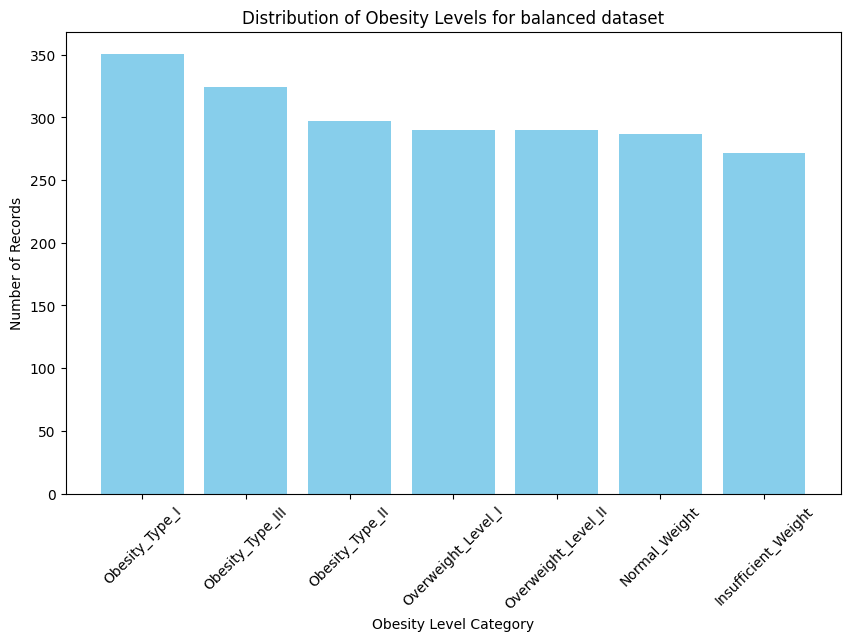

In [51]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df_obesity['Obesity_level'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.xlabel('Obesity Level Category')
plt.ylabel('Number of Records')
plt.title('Distribution of Obesity Levels for balanced dataset')
plt.xticks(rotation=45)
plt.show()

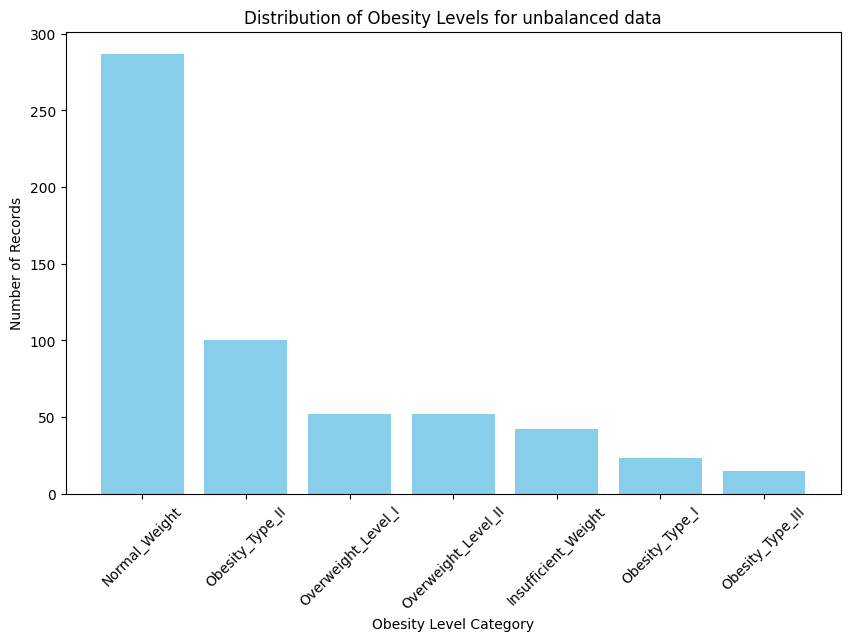

In [52]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df_obesity_unblnc['Obesity_level'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.xlabel('Obesity Level Category')
plt.ylabel('Number of Records')
plt.title('Distribution of Obesity Levels for unbalanced data')
plt.xticks(rotation=45)
plt.show()

The imbalanced dataset shows that Each category of the obesity levels does not have same number of data. This helps to mimic real time scenarios.

# Test Train split for unbalance dataset

In [53]:
# Divide dataframe into X and y.
# X -----> Independant features
# y -----> Target feature

X_unblnc = df_obesity_unblnc.iloc[:,:-1]
y_unblnc = df_obesity_unblnc['Obesity_level']

In [54]:
df_obesity_unblnc.shape

(571, 17)

Our goal is to keep to compare the models between Balanced and imbalanced dataset. Hence, we are not adding/removing any feature in the imbalanced dataset. We will keep the same features in both the dataset.

In [55]:
# Selecting only imp features similar to balanced dataset
l_unblnc = ['Weight','Height','Gender','Age','CALC','FAVC','FCVC','CAEC','FAF','MTRANS','CH2O','TUE','SMOKE']
scaled_x_unblnc = X_unblnc[l_unblnc]

In [56]:
scaled_x_unblnc.shape

(571, 13)

In [57]:
# Randomly sampling dataset into train and test set for unbalanced data
from sklearn.model_selection import train_test_split
train_X_unblnc, test_X_unblnc, train_y_unblnc, test_y_unblnc = train_test_split(scaled_x_unblnc, y_unblnc, test_size=0.2, random_state=40)

In [58]:
print('Shape of train_X for Unbalanced Dataset is ',train_X_unblnc.shape)
print('Shape of train_y for Unbalanced Dataset is ',train_y_unblnc.shape)
print('Shape of test_X for Unbalanced Dataset is',test_X_unblnc.shape)
print('Shape of test_y for Unbalanced Dataset is',test_y_unblnc.shape)

Shape of train_X for Unbalanced Dataset is  (456, 13)
Shape of train_y for Unbalanced Dataset is  (456,)
Shape of test_X for Unbalanced Dataset is (115, 13)
Shape of test_y for Unbalanced Dataset is (115,)


# Model Implementation - Baseline Models

We are using Logistic Regression, Naive Bayes and SVM as our Baseline Models. In the subsequent steps, we will be comparing the training and test results between the Baseline models for Balanced and Imbalanced datasets.

# Model 1.1 - Naive Bayes on Balanced Dataset

In [59]:
# Using Gaussian Naive Bayes
#import library
from sklearn.naive_bayes import GaussianNB

#fit the model
nb_model_blnc = GaussianNB()
nb_model_blnc.fit(train_X_blnc, train_y_blnc)

GaussianNB()

Accuracy of Naive Bayes model on Balanced dataset(Train split).

In [60]:
#Import library
from sklearn.metrics import accuracy_score, confusion_matrix

# Make predictions on the training data
y_train_pred_blnc = nb_model_blnc.predict(train_X_blnc)

# Calculate the accuracy on the training data
train_accuracy_nb_blnc = accuracy_score(train_y_blnc, y_train_pred_blnc)

print("Training Accuracy of Naive Bayes Model on Balanced dataset  :", train_accuracy_nb_blnc)

Training Accuracy of Naive Bayes Model on Balanced dataset  : 0.6812796208530806


Accuracy of Naive Bayes model on Balanced dataset(Test split).

In [61]:
#Import library
from sklearn.metrics import accuracy_score, confusion_matrix
# Making predictions
y_pred_nb_blnc = nb_model_blnc.predict(test_X_blnc)

# Evaluating the model
test_accuracy_nb_blnc = accuracy_score(test_y_blnc, y_pred_nb_blnc)
conf_matrix_nb_blnc = confusion_matrix(test_y_blnc, y_pred_nb_blnc)

print("Test Accuracy of Naive Bayes Model on Balanced dataset  :", test_accuracy_nb_blnc)
print("Confusion Matrix of Naive Bayes Model on Balanced data on :\n", conf_matrix_nb_blnc)

Test Accuracy of Naive Bayes Model on Balanced dataset  : 0.6595744680851063
Confusion Matrix of Naive Bayes Model on Balanced data on :
 [[56  0  0  0  1  2  0]
 [23 16  0  0  2 10  7]
 [ 0  1 47 18  1  2  4]
 [ 0  0 11 52  0  1  0]
 [ 0  0  0  0 59  0  0]
 [ 2  2 10  0  2 25 11]
 [ 1 11 17  4  0  1 24]]


# Model 1.1.1. - Apply cross validation on Naive Bayes for Balanced Dataset

In [62]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
nb_model_blnc_cv = GaussianNB()

# Apply cross-validation
cv_scores_nb_model_blnc = cross_val_score(nb_model_blnc_cv, train_X_blnc, train_y_blnc, cv=5, scoring='accuracy')

# Print the cross-validation scores for each fold
print(f'Cross-validation scores for each fold for Balanced data: {cv_scores_nb_model_blnc}')

# Print the mean and standard deviation of the cross-validation scores
print(f'Mean cross-validation accuracy for Balanced data: {cv_scores_nb_model_blnc.mean():.4f}')
print(f'Standard deviation of cross-validation accuracy for Balanced data: {cv_scores_nb_model_blnc.std():.4f}')

Cross-validation scores for each fold for Balanced data: [0.63905325 0.52071006 0.65088757 0.69732938 0.57863501]
Mean cross-validation accuracy for Balanced data: 0.6173
Standard deviation of cross-validation accuracy for Balanced data: 0.0614


We applied Cross validation on the Naive Bayes model and trained it on the entire Balanced dataset. But as we can see from the result above, mean accuracy did not increase, rather it decreased from 68% to 61%.

# Model 1.2 - Naive Bayes on Unbalanced Dataset

In [63]:
# Using Gaussian Naive Bayes
#import library
from sklearn.naive_bayes import GaussianNB

#fit the model
nb_model_unblnc = GaussianNB()
nb_model_unblnc.fit(train_X_unblnc, train_y_unblnc)

GaussianNB()

In [64]:
# Make predictions on the training data
y_train_pred_unblnc = nb_model_blnc.predict(train_X_unblnc)

# Calculate the accuracy on the training data
train_accuracy_nb_unblnc = accuracy_score(train_y_unblnc, y_train_pred_unblnc)

print("Training Accuracy of Naive Bayes Model on unbalanced dataset  :", train_accuracy_nb_unblnc)

Training Accuracy of Naive Bayes Model on unbalanced dataset  : 0.506578947368421


In [65]:
#Import library
from sklearn.metrics import accuracy_score, confusion_matrix
# Making predictions
y_pred_nb_unblnc = nb_model_unblnc.predict(test_X_unblnc)

# Evaluating the model
test_accuracy_nb_unblnc = accuracy_score(test_y_unblnc, y_pred_nb_unblnc)
conf_matrix_nb_unblnc = confusion_matrix(test_y_unblnc, y_pred_nb_unblnc)

print("Test Accuracy of Naive Bayes Model on Unbalanced dataset:", test_accuracy_nb_unblnc)
print("Confusion Matrix of Naive Bayes Model on Unbalanced data :\n:\n", conf_matrix_nb_unblnc)

Test Accuracy of Naive Bayes Model on Unbalanced dataset: 0.2956521739130435
Confusion Matrix of Naive Bayes Model on Unbalanced data :
:
 [[ 6  0  3  0  0  0  0]
 [13  5 41  3  0  0  0]
 [ 0  0  3  4  0  0  0]
 [ 0  1  0 16  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  1  8  0  0  0  0]
 [ 3  0  3  1  0  0  1]]


# Model 1.2.1- Apply cross validation on Naive Bayes for Unbalanced Dataset

In [66]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
nb_model_blnc_cv = GaussianNB()

# Apply cross-validation
cv_scores_nb_model_unblnc = cross_val_score(nb_model_blnc_cv, train_X_unblnc, train_y_unblnc, cv=5, scoring='accuracy')

# Print the cross-validation scores for each fold
print(f'Cross-validation scores for each fold for unbalanced data: {cv_scores_nb_model_unblnc}')

# Print the mean and standard deviation of the cross-validation scores
print(f'Mean cross-validation accuracy for unbalanced data: {cv_scores_nb_model_unblnc.mean():.4f}')
print(f'Standard deviation of cross-validation accuracy for unbalanced data: {cv_scores_nb_model_unblnc.std():.4f}')

Cross-validation scores for each fold for unbalanced data: [0.33695652 0.32967033 0.17582418 0.31868132 0.26373626]
Mean cross-validation accuracy for unbalanced data: 0.2850
Standard deviation of cross-validation accuracy for unbalanced data: 0.0603


We tried the cross validation on unbalanced data as well using Naive Bayes. But the performance did not improve much, it reduced from 29% to 28.5%.

# Model 2.1 - Logistic Regression on Balanced Dataset

In [67]:
#import libraries
from sklearn.linear_model import LogisticRegression

# Creating a logistic regression model
logistic_model_blnc = LogisticRegression()
logistic_model_blnc.fit(train_X_blnc, train_y_blnc)  # Fitting the model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Training accuracy on Balance Dataset for logistic Regression Model.

In [68]:
# Predicting the model
pred_logistic_train_blnc = logistic_model_blnc.predict(train_X_blnc)

# Determining accuracy of model using confusion matrix
result_logistic_train_blnc = confusion_matrix(train_y_blnc, pred_logistic_train_blnc)
print("Confusion Matrix of Logistic Regression Model on balanced data(Train split):\n",result_logistic_train_blnc)

# Accuracy using accuracy_score
logistic_model_accuracy_train_blnc = accuracy_score(train_y_blnc, pred_logistic_train_blnc)
print('logistic_model_accuracy on balanced data(Train Split): %0.2f' % logistic_model_accuracy_train_blnc)

Confusion Matrix of Logistic Regression Model on balanced data(Train split):
 [[209   4   0   0   0   0   0]
 [ 23 175   0   0   0  30   1]
 [  0   0 254  15   0   0   9]
 [  0   0   3 229   1   0   0]
 [  0   0   0   1 264   0   0]
 [  0   9   0   0   0 190  39]
 [  0   0   7   0   0  32 193]]
logistic_model_accuracy on balanced data(Train Split): 0.90


In [69]:
# Predicting the model
pred_logistic_blnc = logistic_model_blnc.predict(test_X_blnc)

In [70]:
# Determining accuracy of model using confusion matrix
result_logistic_blnc = confusion_matrix(test_y_blnc, pred_logistic_blnc)
print("Confusion Matrix of Logistic Regression Model on balanced data(Test Split):\n",result_logistic_blnc)

Confusion Matrix of Logistic Regression Model on balanced data(Test Split):
 [[59  0  0  0  0  0  0]
 [ 5 41  0  0  0  8  4]
 [ 0  0 68  3  1  0  1]
 [ 0  0  0 64  0  0  0]
 [ 0  0  0  0 59  0  0]
 [ 0  3  0  0  0 43  6]
 [ 0  1  6  0  0  9 42]]


In [71]:
# Accuracy using accuracy_score
logistic_model_accuracy_test_blnc = accuracy_score(test_y_blnc, pred_logistic_blnc)
print('logistic_model_accuracy on balanced data(Test Split): %0.2f' % logistic_model_accuracy_test_blnc)

logistic_model_accuracy on balanced data(Test Split): 0.89


# Model 2.1.1 - Cross validation of Logistic Regression on Balanced Dataset

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Initialize the logistic regression model with increased max_iter
logistic_model_blnc = LogisticRegression(max_iter=1000)

# Apply cross-validation
# 'cv' specifies the number of folds (e.g., 5 for 5-fold cross-validation)
# 'scoring' specifies the evaluation metric, e.g., 'accuracy' for classification accuracy
cv_scores_lr_blnc = cross_val_score(logistic_model_blnc, train_X_blnc, train_y_blnc, cv=5, scoring='accuracy')

# Print the cross-validation scores for each fold
print(f'Cross-validation scores for each fold: {cv_scores_lr_blnc}')

# Print the mean and standard deviation of the cross-validation scores
print(f'Mean cross-validation accuracy of Logistic Regression for Balanced Data: {cv_scores_lr_blnc.mean():.4f}')
print(f'Standard deviation of cross-validation accuracy of Logistic Regression for Balanced Data: {cv_scores_lr_blnc.std():.4f}')

Cross-validation scores for each fold: [0.87869822 0.86390533 0.88461538 0.87833828 0.85459941]
Mean cross-validation accuracy of Logistic Regression for Balanced Data: 0.8720
Standard deviation of cross-validation accuracy of Logistic Regression for Balanced Data: 0.0111


We applied cross validation on the logistic model for balanced dataset. But the performance did not improve. Initial accuracy was 90% and after cross validation the accuracy reduced to 87%.

# Model 2.2 - Logistic Regression on Unbalanced Dataset

In [73]:
#import libraries
from sklearn.linear_model import LogisticRegression

# Creating a logistic regression model
logistic_model_unblnc = LogisticRegression()
logistic_model_unblnc.fit(train_X_unblnc, train_y_unblnc)

LogisticRegression()

Accuracy of Logistic Regression on Unbalanced dataset for Train split

In [74]:
pred_logistic_train_unblnc = logistic_model_unblnc.predict(train_X_unblnc)

In [75]:
# Determining accuracy of model using confusion matrix
result_logistic_train_unblnc = confusion_matrix(train_y_unblnc, pred_logistic_train_unblnc)
print("Confusion Matrix of Logistic Regression Model on unbalanced data(Train Split):\n",result_logistic_train_unblnc)

Confusion Matrix of Logistic Regression Model on unbalanced data(Train Split):
 [[  3  30   0   0   0   0   0]
 [  0 225   0   0   0   0   0]
 [  0   0   5   8   0   3   0]
 [  0   0   0  83   0   0   0]
 [  0   0   0   0  12   0   0]
 [  0  35   0   0   0   3   5]
 [  0   4   1   3   0   6  30]]


In [76]:
# Accuracy using accuracy_score
logistic_model__train_unblnc_accuracy = accuracy_score(train_y_unblnc, pred_logistic_train_unblnc)
print('logistic_model_accuracy for unbalanced data(Train split): %0.2f' % logistic_model__train_unblnc_accuracy)

logistic_model_accuracy for unbalanced data(Train split): 0.79


In [77]:
# Predicting the model
pred_logistic_unblnc = logistic_model_unblnc.predict(test_X_unblnc)

In [78]:
# Determining accuracy of model using confusion matrix
result_logistic_test_unblnc = confusion_matrix(test_y_unblnc, pred_logistic_unblnc)
print("Confusion Matrix of Logistic Regression Model on unbalanced data(Test Split):\n",result_logistic_test_unblnc)

Confusion Matrix of Logistic Regression Model on unbalanced data(Test Split):
 [[ 2  7  0  0  0  0  0]
 [ 0 62  0  0  0  0  0]
 [ 0  0  0  2  0  3  2]
 [ 0  0  0 16  0  0  1]
 [ 0  0  0  0  3  0  0]
 [ 0  6  0  0  0  1  2]
 [ 0  3  1  0  0  0  4]]


In [79]:
# Accuracy using accuracy_score
result_logistic_test_unblnc = accuracy_score(test_y_unblnc, pred_logistic_unblnc)
print('logistic_model_accuracy on unbalanced data(Test Split): %0.2f' % result_logistic_test_unblnc)

logistic_model_accuracy on unbalanced data(Test Split): 0.77


# Model 2.2.1 - Cross validation of Logistic Regression on Unbalanced Dataset

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Initialize the logistic regression model with increased max_iter
logistic_model_unblnc = LogisticRegression(max_iter=1000)

# Apply cross-validation
# 'cv' specifies the number of folds (e.g., 5 for 5-fold cross-validation)
# 'scoring' specifies the evaluation metric, e.g., 'accuracy' for classification accuracy
cv_scores_lr_unblnc = cross_val_score(logistic_model_unblnc, train_X_unblnc, train_y_unblnc, cv=5, scoring='accuracy')

# Print the cross-validation scores for each fold
print(f'Cross-validation scores for each fold: {cv_scores_lr_unblnc}')

# Print the mean and standard deviation of the cross-validation scores
print(f'Mean cross-validation accuracy of Logistic Regression for Unbalanced Data: {cv_scores_lr_unblnc.mean():.4f}')
print(f'Standard deviation of cross-validation accuracy of Logistic Regression for Unbalanced Data: {cv_scores_lr_unblnc.std():.4f}')

Cross-validation scores for each fold: [0.7826087  0.76923077 0.73626374 0.71428571 0.74725275]
Mean cross-validation accuracy of Logistic Regression for Unbalanced Data: 0.7499
Standard deviation of cross-validation accuracy of Logistic Regression for Unbalanced Data: 0.0241


We applied the cross validation on Unbalanced data for Logistic Regression model. But the performance decreased from 79% to 74%.

# Model 3.1 - SVM on Balanced Dataset

In [81]:
#import library
from sklearn.svm import SVC
# Creating the model
svc_model_simp_blnc = SVC()
svc_model_simp_blnc.fit(train_X_blnc, train_y_blnc)

SVC()

In [82]:
# Predicting the model
pred_svc_train_blnc = svc_model_simp_blnc.predict(train_X_blnc)
pred_svc_train_blnc

array(['Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', ...,
       'Obesity_Type_III', 'Obesity_Type_I', 'Obesity_Type_III'],
      dtype=object)

In [83]:
from sklearn.metrics import classification_report, accuracy_score

# Print the classification report and accuracy
print(classification_report(train_y_blnc, pred_svc_train_blnc))
print("Train Accuracy of SVM on Balanced dataset:", accuracy_score(train_y_blnc, pred_svc_train_blnc))

                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.97      0.97       213
      Normal_Weight       0.93      0.89      0.91       229
     Obesity_Type_I       0.99      0.99      0.99       278
    Obesity_Type_II       1.00      0.99      0.99       233
   Obesity_Type_III       1.00      1.00      1.00       265
 Overweight_Level_I       0.91      0.92      0.91       238
Overweight_Level_II       0.93      0.95      0.94       232

           accuracy                           0.96      1688
          macro avg       0.96      0.96      0.96      1688
       weighted avg       0.96      0.96      0.96      1688

Train Accuracy of SVM on Balanced dataset: 0.9585308056872038


In [84]:
# Predicting the model
pred_svc_test_blnc = svc_model_simp_blnc.predict(test_X_blnc)
pred_svc_test_blnc

array(['Obesity_Type_II', 'Insufficient_Weight', 'Obesity_Type_I',
       'Obesity_Type_I', 'Obesity_Type_I', 'Obesity_Type_II',
       'Obesity_Type_I', 'Overweight_Level_I', 'Insufficient_Weight',
       'Obesity_Type_I', 'Obesity_Type_II', 'Overweight_Level_II',
       'Obesity_Type_I', 'Overweight_Level_II', 'Insufficient_Weight',
       'Insufficient_Weight', 'Insufficient_Weight',
       'Insufficient_Weight', 'Obesity_Type_III', 'Insufficient_Weight',
       'Overweight_Level_I', 'Obesity_Type_I', 'Overweight_Level_II',
       'Overweight_Level_II', 'Obesity_Type_II', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_I', 'Obesity_Type_II',
       'Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_I',
       'Overweight_Level_I', 'Normal_Weight', 'Normal_Weight',
       'Overweight_Level_II', 'Insufficient_Weight', 'Obesity_Type_II',
       'Overweight_Level_I', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I', 'Obesity_Type_I', 'Overweight_Level

In [85]:
# Print the classification report and accuracy
print(classification_report(test_y_blnc, pred_svc_test_blnc))
print("Test Accuracy of SVM on Balanced dataset:", accuracy_score(test_y_blnc, pred_svc_test_blnc))

                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.97      0.93        59
      Normal_Weight       0.87      0.81      0.84        58
     Obesity_Type_I       0.96      0.97      0.97        73
    Obesity_Type_II       0.98      0.98      0.98        64
   Obesity_Type_III       1.00      1.00      1.00        59
 Overweight_Level_I       0.84      0.92      0.88        52
Overweight_Level_II       0.96      0.84      0.90        58

           accuracy                           0.93       423
          macro avg       0.93      0.93      0.93       423
       weighted avg       0.93      0.93      0.93       423

Test Accuracy of SVM on Balanced dataset: 0.9314420803782506


Confusion Matrix for each class

                         precision    recall  f1-score   support

Not Insufficient_Weight       0.99      0.98      0.99       364
    Insufficient_Weight       0.89      0.97      0.93        59

               accuracy                           0.98       423
              macro avg       0.94      0.97      0.96       423
           weighted avg       0.98      0.98      0.98       423



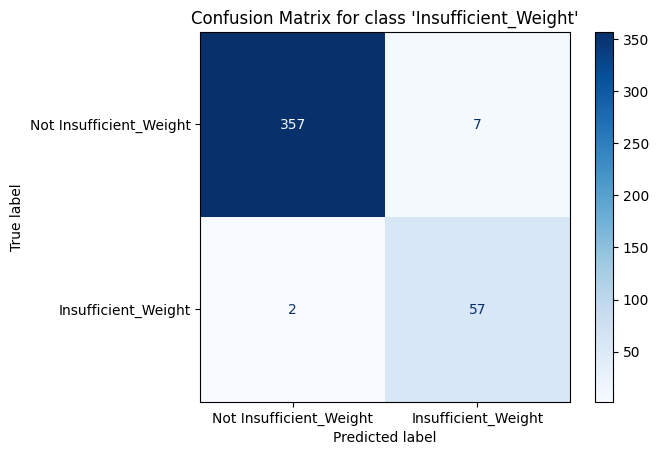

Confusion Matrix for class 'Insufficient_Weight':
[[357   7]
 [  2  57]]
True Positives (TP): 357
False Positives (FP): 7
False Negatives (FN): 2
True Negatives (TN): 57
------------------------------
                   precision    recall  f1-score   support

Not Normal_Weight       0.97      0.98      0.98       365
    Normal_Weight       0.87      0.81      0.84        58

         accuracy                           0.96       423
        macro avg       0.92      0.90      0.91       423
     weighted avg       0.96      0.96      0.96       423



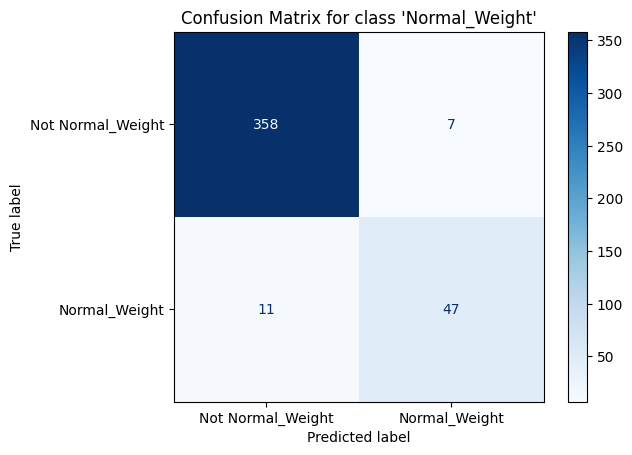

Confusion Matrix for class 'Normal_Weight':
[[358   7]
 [ 11  47]]
True Positives (TP): 358
False Positives (FP): 7
False Negatives (FN): 11
True Negatives (TN): 47
------------------------------
                    precision    recall  f1-score   support

Not Obesity_Type_I       0.99      0.99      0.99       350
    Obesity_Type_I       0.96      0.97      0.97        73

          accuracy                           0.99       423
         macro avg       0.98      0.98      0.98       423
      weighted avg       0.99      0.99      0.99       423



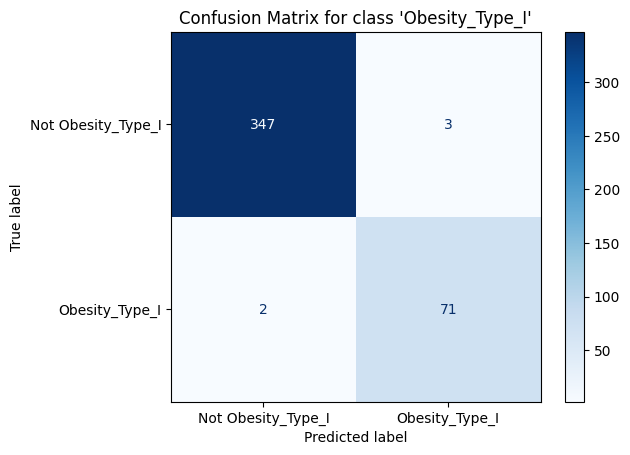

Confusion Matrix for class 'Obesity_Type_I':
[[347   3]
 [  2  71]]
True Positives (TP): 347
False Positives (FP): 3
False Negatives (FN): 2
True Negatives (TN): 71
------------------------------
                     precision    recall  f1-score   support

Not Obesity_Type_II       1.00      1.00      1.00       359
    Obesity_Type_II       0.98      0.98      0.98        64

           accuracy                           1.00       423
          macro avg       0.99      0.99      0.99       423
       weighted avg       1.00      1.00      1.00       423



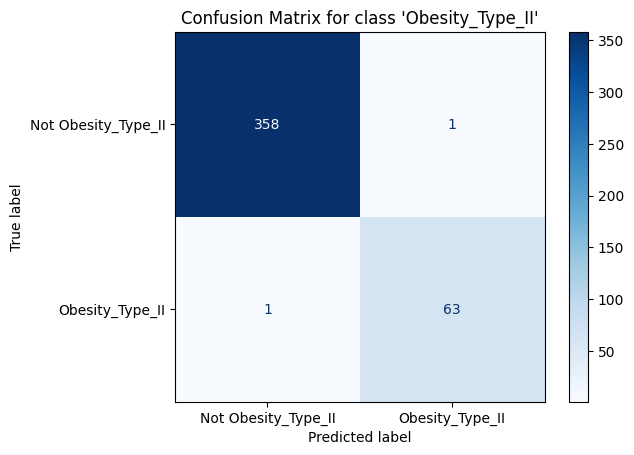

Confusion Matrix for class 'Obesity_Type_II':
[[358   1]
 [  1  63]]
True Positives (TP): 358
False Positives (FP): 1
False Negatives (FN): 1
True Negatives (TN): 63
------------------------------
                      precision    recall  f1-score   support

Not Obesity_Type_III       1.00      1.00      1.00       364
    Obesity_Type_III       1.00      1.00      1.00        59

            accuracy                           1.00       423
           macro avg       1.00      1.00      1.00       423
        weighted avg       1.00      1.00      1.00       423



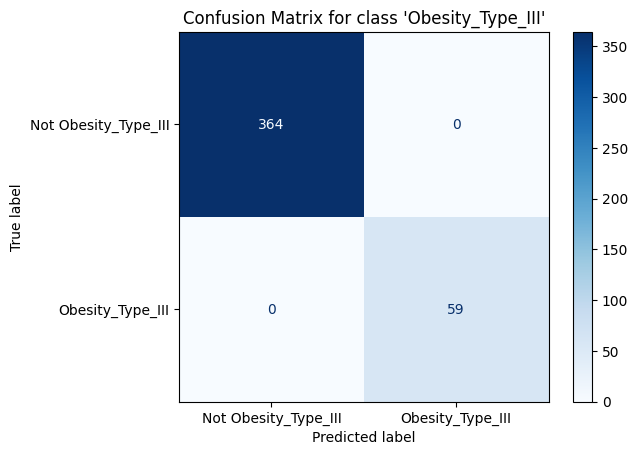

Confusion Matrix for class 'Obesity_Type_III':
[[364   0]
 [  0  59]]
True Positives (TP): 364
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 59
------------------------------
                        precision    recall  f1-score   support

Not Overweight_Level_I       0.99      0.98      0.98       371
    Overweight_Level_I       0.84      0.92      0.88        52

              accuracy                           0.97       423
             macro avg       0.92      0.95      0.93       423
          weighted avg       0.97      0.97      0.97       423



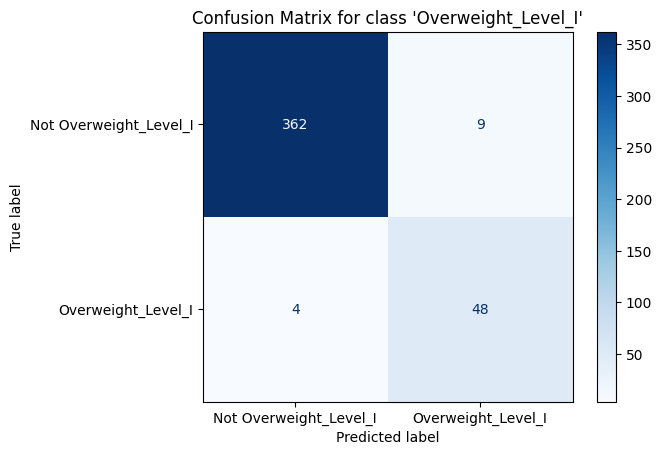

Confusion Matrix for class 'Overweight_Level_I':
[[362   9]
 [  4  48]]
True Positives (TP): 362
False Positives (FP): 9
False Negatives (FN): 4
True Negatives (TN): 48
------------------------------
                         precision    recall  f1-score   support

Not Overweight_Level_II       0.98      0.99      0.99       365
    Overweight_Level_II       0.96      0.84      0.90        58

               accuracy                           0.97       423
              macro avg       0.97      0.92      0.94       423
           weighted avg       0.97      0.97      0.97       423



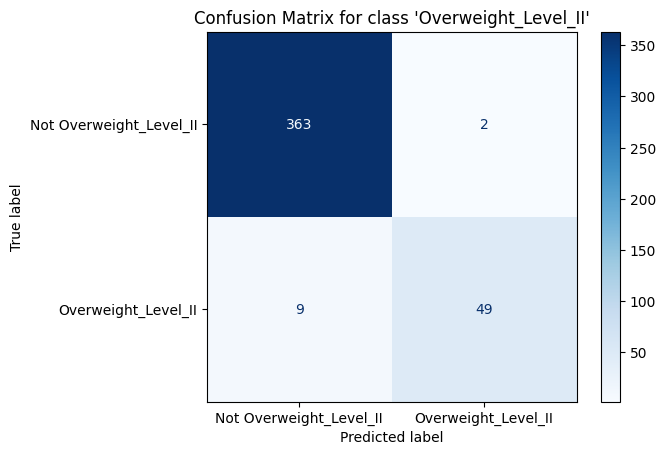

Confusion Matrix for class 'Overweight_Level_II':
[[363   2]
 [  9  49]]
True Positives (TP): 363
False Positives (FP): 2
False Negatives (FN): 9
True Negatives (TN): 49
------------------------------


In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Unique classes
classes = np.unique(test_y_blnc)

# Compute and display binary confusion matrix for each class
for target_class in classes:
    # Binarize the true and predicted labels
    y_true_binary = (test_y_blnc == target_class).astype(int)
    y_pred_binary = (pred_svc_test_blnc == target_class).astype(int)

    # Compute confusion matrix
    cm = confusion_matrix(y_true_binary, y_pred_binary)

    # Extract metrics
    TP = cm[0, 0]  # True Positives
    FP = cm[0, 1]  # False Positives
    FN = cm[1, 0]  # False Negatives
    TN = cm[1, 1]  # True Negatives

    # Print classification report for the binary task
    print(classification_report(y_true_binary, y_pred_binary, target_names=[f"Not {target_class}",target_class], zero_division=0))
    print("=" * 50)

    # Display confusion matrix using ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f'Not {target_class}',target_class])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for class '{target_class}'")
    plt.show()

    # Display extracted metrics
    print(f"Confusion Matrix for class '{target_class}':")
    print(cm)
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")
    print("-" * 30)

# 3.2 Predict SVC model(Trained on Balanced dataset) on unbalanced dataset

In [87]:
# Predicting the model on test data for unbalanced set
pred_svc_unblnc = svc_model_simp_blnc.predict(scaled_x_unblnc)
pred_svc_unblnc

array(['Insufficient_Weight', 'Insufficient_Weight',
       'Insufficient_Weight', 'Insufficient_Weight',
       'Insufficient_Weight', 'Insufficient_Weight',
       'Insufficient_Weight', 'Insufficient_Weight',
       'Insufficient_Weight', 'Insufficient_Weight',
       'Insufficient_Weight', 'Normal_Weight', 'Insufficient_Weight',
       'Insufficient_Weight', 'Insufficient_Weight',
       'Insufficient_Weight', 'Insufficient_Weight',
       'Insufficient_Weight', 'Insufficient_Weight',
       'Insufficient_Weight', 'Insufficient_Weight',
       'Insufficient_Weight', 'Insufficient_Weight',
       'Insufficient_Weight', 'Insufficient_Weight',
       'Insufficient_Weight', 'Insufficient_Weight',
       'Insufficient_Weight', 'Insufficient_Weight',
       'Insufficient_Weight', 'Insufficient_Weight',
       'Insufficient_Weight', 'Insufficient_Weight',
       'Insufficient_Weight', 'Insufficient_Weight',
       'Insufficient_Weight', 'Insufficient_Weight',
       'Insufficient_Weight',

In [88]:
# Print the classification report and accuracy
print(classification_report(y_unblnc, pred_svc_unblnc))
print("Accuracy of SVM on Unbalanced dataset:", accuracy_score(y_unblnc, pred_svc_unblnc))

                     precision    recall  f1-score   support

Insufficient_Weight       0.72      0.98      0.83        42
      Normal_Weight       0.98      0.87      0.92       287
     Obesity_Type_I       1.00      0.96      0.98        23
    Obesity_Type_II       1.00      1.00      1.00       100
   Obesity_Type_III       1.00      1.00      1.00        15
 Overweight_Level_I       0.68      0.92      0.78        52
Overweight_Level_II       0.94      0.96      0.95        52

           accuracy                           0.92       571
          macro avg       0.90      0.95      0.92       571
       weighted avg       0.94      0.92      0.92       571

Accuracy of SVM on Unbalanced dataset: 0.9194395796847635


                         precision    recall  f1-score   support

Not Insufficient_Weight       1.00      0.97      0.98       529
    Insufficient_Weight       0.72      0.98      0.83        42

               accuracy                           0.97       571
              macro avg       0.86      0.97      0.91       571
           weighted avg       0.98      0.97      0.97       571



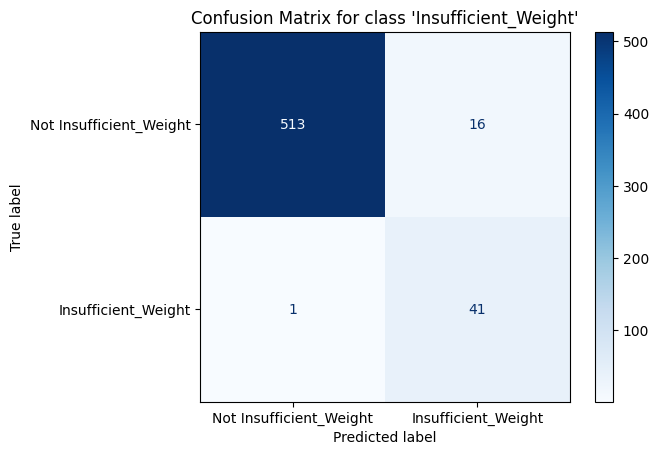

Confusion Matrix for class 'Insufficient_Weight':
[[513  16]
 [  1  41]]
True Positives (TP): 513
False Positives (FP): 16
False Negatives (FN): 1
True Negatives (TN): 41
------------------------------
                   precision    recall  f1-score   support

Not Normal_Weight       0.88      0.99      0.93       284
    Normal_Weight       0.98      0.87      0.92       287

         accuracy                           0.93       571
        macro avg       0.93      0.93      0.93       571
     weighted avg       0.93      0.93      0.93       571



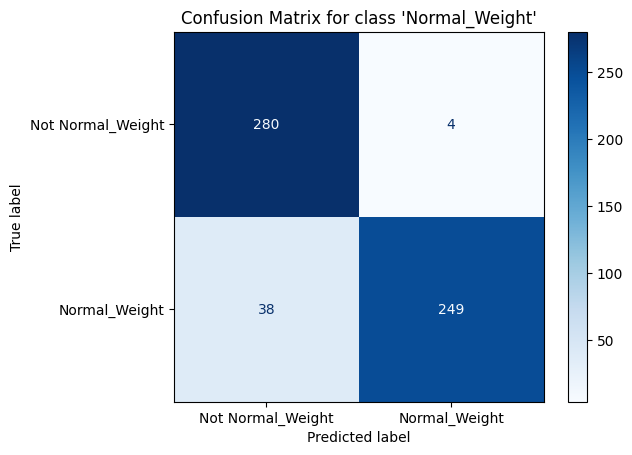

Confusion Matrix for class 'Normal_Weight':
[[280   4]
 [ 38 249]]
True Positives (TP): 280
False Positives (FP): 4
False Negatives (FN): 38
True Negatives (TN): 249
------------------------------
                    precision    recall  f1-score   support

Not Obesity_Type_I       1.00      1.00      1.00       548
    Obesity_Type_I       1.00      0.96      0.98        23

          accuracy                           1.00       571
         macro avg       1.00      0.98      0.99       571
      weighted avg       1.00      1.00      1.00       571



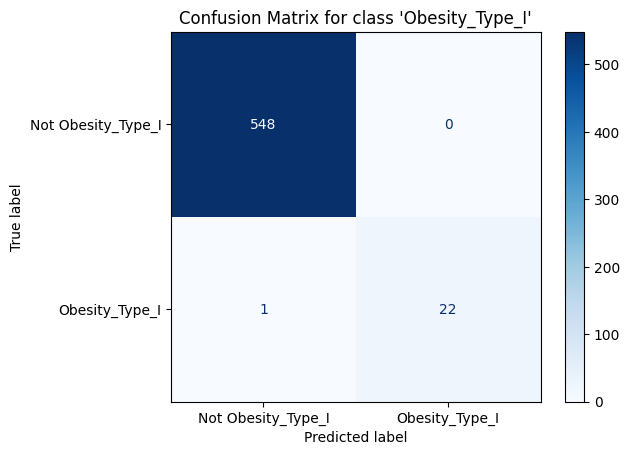

Confusion Matrix for class 'Obesity_Type_I':
[[548   0]
 [  1  22]]
True Positives (TP): 548
False Positives (FP): 0
False Negatives (FN): 1
True Negatives (TN): 22
------------------------------
                     precision    recall  f1-score   support

Not Obesity_Type_II       1.00      1.00      1.00       471
    Obesity_Type_II       1.00      1.00      1.00       100

           accuracy                           1.00       571
          macro avg       1.00      1.00      1.00       571
       weighted avg       1.00      1.00      1.00       571



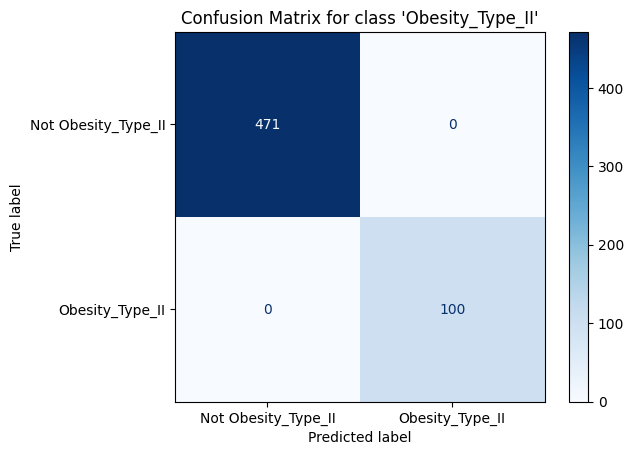

Confusion Matrix for class 'Obesity_Type_II':
[[471   0]
 [  0 100]]
True Positives (TP): 471
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 100
------------------------------
                      precision    recall  f1-score   support

Not Obesity_Type_III       1.00      1.00      1.00       556
    Obesity_Type_III       1.00      1.00      1.00        15

            accuracy                           1.00       571
           macro avg       1.00      1.00      1.00       571
        weighted avg       1.00      1.00      1.00       571



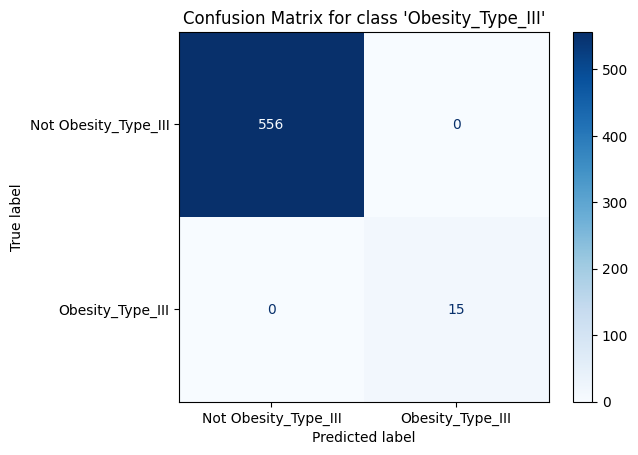

Confusion Matrix for class 'Obesity_Type_III':
[[556   0]
 [  0  15]]
True Positives (TP): 556
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 15
------------------------------
                        precision    recall  f1-score   support

Not Overweight_Level_I       0.99      0.96      0.97       519
    Overweight_Level_I       0.68      0.92      0.78        52

              accuracy                           0.95       571
             macro avg       0.83      0.94      0.88       571
          weighted avg       0.96      0.95      0.96       571



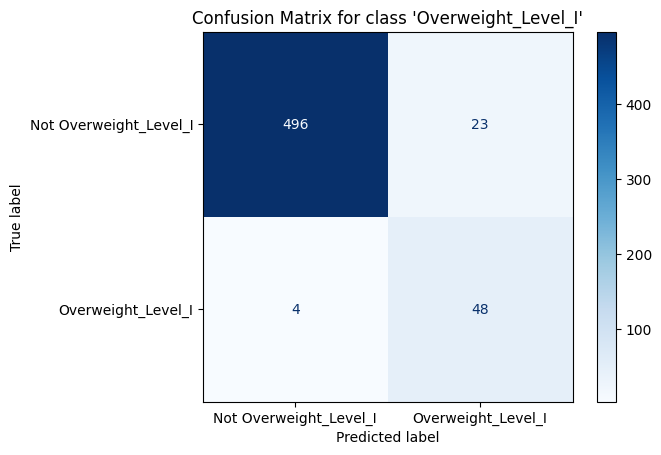

Confusion Matrix for class 'Overweight_Level_I':
[[496  23]
 [  4  48]]
True Positives (TP): 496
False Positives (FP): 23
False Negatives (FN): 4
True Negatives (TN): 48
------------------------------
                         precision    recall  f1-score   support

Not Overweight_Level_II       1.00      0.99      1.00       519
    Overweight_Level_II       0.94      0.96      0.95        52

               accuracy                           0.99       571
              macro avg       0.97      0.98      0.97       571
           weighted avg       0.99      0.99      0.99       571



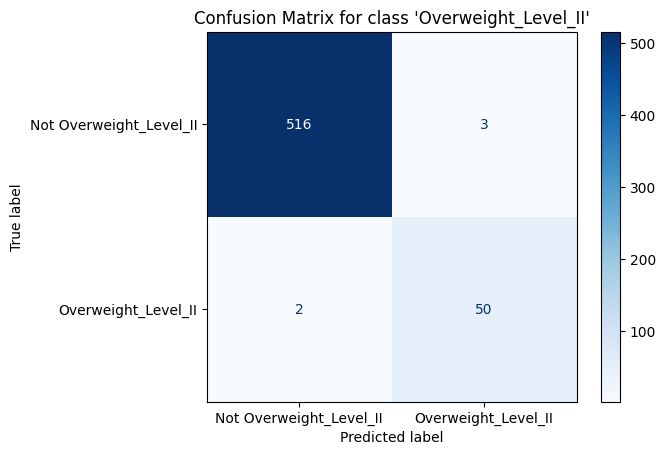

Confusion Matrix for class 'Overweight_Level_II':
[[516   3]
 [  2  50]]
True Positives (TP): 516
False Positives (FP): 3
False Negatives (FN): 2
True Negatives (TN): 50
------------------------------


In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Unique classes
classes = np.unique(y_unblnc)

# Compute and display binary confusion matrix for each class
for target_class in classes:
    # Binarize the true and predicted labels
    y_true_binary = (y_unblnc == target_class).astype(int)
    y_pred_binary = (pred_svc_unblnc == target_class).astype(int)

    # Compute confusion matrix
    cm = confusion_matrix(y_true_binary, y_pred_binary)

    # Extract metrics
    TP = cm[0, 0]  # True Positives
    FP = cm[0, 1]  # False Positives
    FN = cm[1, 0]  # False Negatives
    TN = cm[1, 1]  # True Negatives

    # Print classification report for the binary task
    print(classification_report(y_true_binary, y_pred_binary, target_names=[f"Not {target_class}",target_class], zero_division=0))
    print("=" * 50)

    # Display confusion matrix using ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f'Not {target_class}',target_class])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for class '{target_class}'")
    plt.show()

    # Display extracted metrics
    print(f"Confusion Matrix for class '{target_class}':")
    print(cm)
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")
    print("-" * 30)

# Model 3.3 - SVM on Unbalanced Dataset

In [90]:
#import library
from sklearn.svm import SVC
# Creating the model
svc_model_simp_unblnc = SVC()
svc_model_simp_unblnc.fit(train_X_unblnc, train_y_unblnc)

SVC()

In [91]:
# Predicting the model
pred_svc_train_unblnc = svc_model_simp_unblnc.predict(train_X_unblnc)
pred_svc_train_unblnc

array(['Overweight_Level_II', 'Obesity_Type_II', 'Normal_Weight',
       'Normal_Weight', 'Normal_Weight', 'Overweight_Level_I',
       'Obesity_Type_II', 'Normal_Weight', 'Normal_Weight',
       'Obesity_Type_II', 'Normal_Weight', 'Normal_Weight',
       'Normal_Weight', 'Obesity_Type_II', 'Obesity_Type_III',
       'Obesity_Type_II', 'Overweight_Level_II', 'Obesity_Type_II',
       'Overweight_Level_I', 'Normal_Weight', 'Overweight_Level_II',
       'Normal_Weight', 'Normal_Weight', 'Obesity_Type_II',
       'Obesity_Type_I', 'Obesity_Type_II', 'Normal_Weight',
       'Obesity_Type_II', 'Normal_Weight', 'Normal_Weight',
       'Obesity_Type_II', 'Obesity_Type_II', 'Normal_Weight',
       'Normal_Weight', 'Overweight_Level_I', 'Normal_Weight',
       'Normal_Weight', 'Normal_Weight', 'Normal_Weight', 'Normal_Weight',
       'Normal_Weight', 'Obesity_Type_II', 'Obesity_Type_II',
       'Normal_Weight', 'Normal_Weight', 'Normal_Weight',
       'Insufficient_Weight', 'Overweight_Level_II

In [92]:
# Print the classification report and accuracy
print(classification_report(train_y_unblnc, pred_svc_train_unblnc))
print("Train Accuracy of SVM on Unbalanced dataset:", accuracy_score(train_y_unblnc, pred_svc_train_unblnc))

                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.58      0.72        33
      Normal_Weight       0.81      1.00      0.89       225
     Obesity_Type_I       1.00      0.56      0.72        16
    Obesity_Type_II       0.99      1.00      0.99        83
   Obesity_Type_III       1.00      1.00      1.00        12
 Overweight_Level_I       0.80      0.28      0.41        43
Overweight_Level_II       0.92      0.80      0.85        44

           accuracy                           0.86       456
          macro avg       0.92      0.74      0.80       456
       weighted avg       0.87      0.86      0.85       456

Train Accuracy of SVM on Unbalanced dataset: 0.8640350877192983


In [93]:
# Predicting the model on test data for unbalanced set
pred_svc_test_unblnc = svc_model_simp_unblnc.predict(test_X_unblnc)
pred_svc_test_unblnc

array(['Normal_Weight', 'Insufficient_Weight', 'Obesity_Type_I',
       'Obesity_Type_I', 'Normal_Weight', 'Obesity_Type_II',
       'Normal_Weight', 'Normal_Weight', 'Normal_Weight', 'Normal_Weight',
       'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
       'Normal_Weight', 'Normal_Weight', 'Obesity_Type_II',
       'Normal_Weight', 'Obesity_Type_III', 'Obesity_Type_II',
       'Overweight_Level_II', 'Normal_Weight', 'Normal_Weight',
       'Overweight_Level_II', 'Normal_Weight', 'Normal_Weight',
       'Normal_Weight', 'Normal_Weight', 'Obesity_Type_II',
       'Normal_Weight', 'Normal_Weight', 'Normal_Weight', 'Normal_Weight',
       'Normal_Weight', 'Normal_Weight', 'Normal_Weight', 'Normal_Weight',
       'Normal_Weight', 'Normal_Weight', 'Obesity_Type_II',
       'Obesity_Type_III', 'Normal_Weight', 'Normal_Weight',
       'Normal_Weight', 'Normal_Weight', 'Overweight_Level_II',
       'Insufficient_Weight', 'Normal_Weight', 'Normal_Weight',
       'Normal_Weigh

In [94]:
# Print the classification report and accuracy
print(classification_report(test_y_unblnc, pred_svc_test_unblnc))
print("Test Accuracy of SVM on Unbalanced dataset:", accuracy_score(test_y_unblnc, pred_svc_test_unblnc))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.33      0.50         9
      Normal_Weight       0.79      1.00      0.89        62
     Obesity_Type_I       1.00      0.43      0.60         7
    Obesity_Type_II       0.94      0.94      0.94        17
   Obesity_Type_III       1.00      1.00      1.00         3
 Overweight_Level_I       1.00      0.22      0.36         9
Overweight_Level_II       0.67      0.75      0.71         8

           accuracy                           0.83       115
          macro avg       0.91      0.67      0.71       115
       weighted avg       0.86      0.83      0.80       115

Test Accuracy of SVM on Unbalanced dataset: 0.8260869565217391


Confusion Matrix for each class.

                         precision    recall  f1-score   support

Not Insufficient_Weight       0.95      1.00      0.97       106
    Insufficient_Weight       1.00      0.33      0.50         9

               accuracy                           0.95       115
              macro avg       0.97      0.67      0.74       115
           weighted avg       0.95      0.95      0.94       115



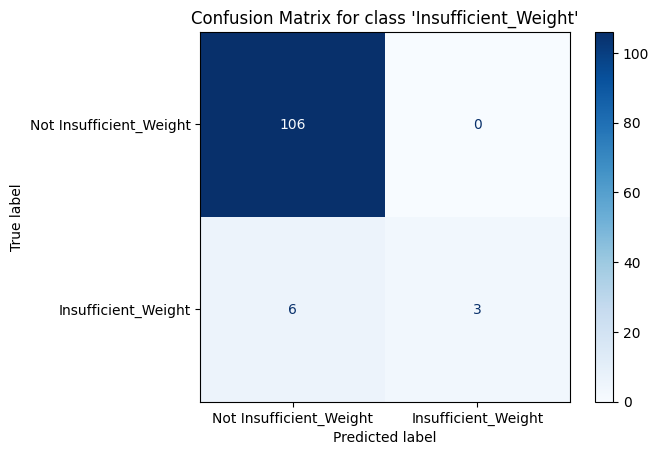

Confusion Matrix for class 'Insufficient_Weight':
[[106   0]
 [  6   3]]
True Positives (TP): 106
False Positives (FP): 0
False Negatives (FN): 6
True Negatives (TN): 3
------------------------------
                   precision    recall  f1-score   support

Not Normal_Weight       1.00      0.70      0.82        53
    Normal_Weight       0.79      1.00      0.89        62

         accuracy                           0.86       115
        macro avg       0.90      0.85      0.85       115
     weighted avg       0.89      0.86      0.86       115



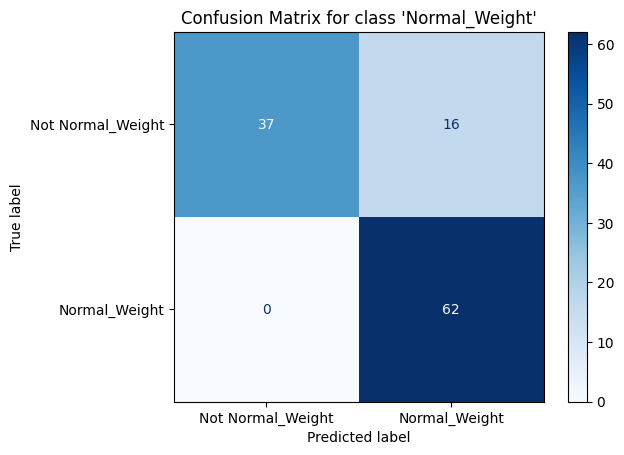

Confusion Matrix for class 'Normal_Weight':
[[37 16]
 [ 0 62]]
True Positives (TP): 37
False Positives (FP): 16
False Negatives (FN): 0
True Negatives (TN): 62
------------------------------
                    precision    recall  f1-score   support

Not Obesity_Type_I       0.96      1.00      0.98       108
    Obesity_Type_I       1.00      0.43      0.60         7

          accuracy                           0.97       115
         macro avg       0.98      0.71      0.79       115
      weighted avg       0.97      0.97      0.96       115



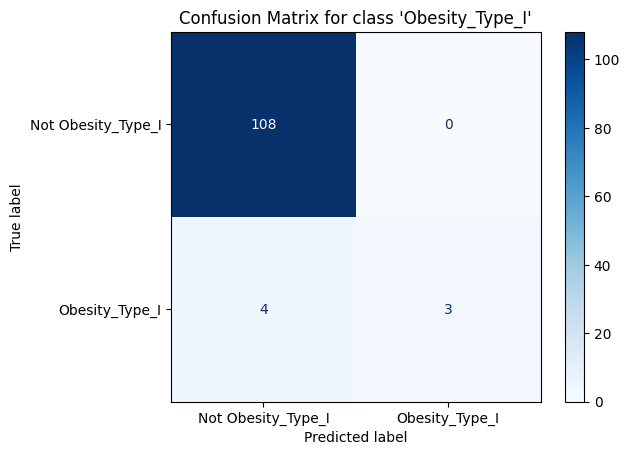

Confusion Matrix for class 'Obesity_Type_I':
[[108   0]
 [  4   3]]
True Positives (TP): 108
False Positives (FP): 0
False Negatives (FN): 4
True Negatives (TN): 3
------------------------------
                     precision    recall  f1-score   support

Not Obesity_Type_II       0.99      0.99      0.99        98
    Obesity_Type_II       0.94      0.94      0.94        17

           accuracy                           0.98       115
          macro avg       0.97      0.97      0.97       115
       weighted avg       0.98      0.98      0.98       115



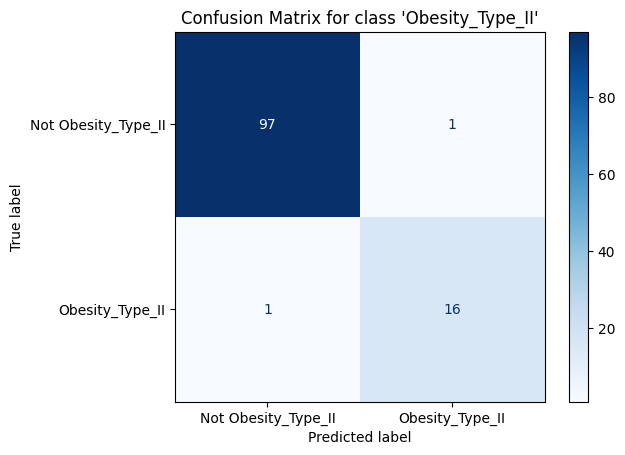

Confusion Matrix for class 'Obesity_Type_II':
[[97  1]
 [ 1 16]]
True Positives (TP): 97
False Positives (FP): 1
False Negatives (FN): 1
True Negatives (TN): 16
------------------------------
                      precision    recall  f1-score   support

Not Obesity_Type_III       1.00      1.00      1.00       112
    Obesity_Type_III       1.00      1.00      1.00         3

            accuracy                           1.00       115
           macro avg       1.00      1.00      1.00       115
        weighted avg       1.00      1.00      1.00       115



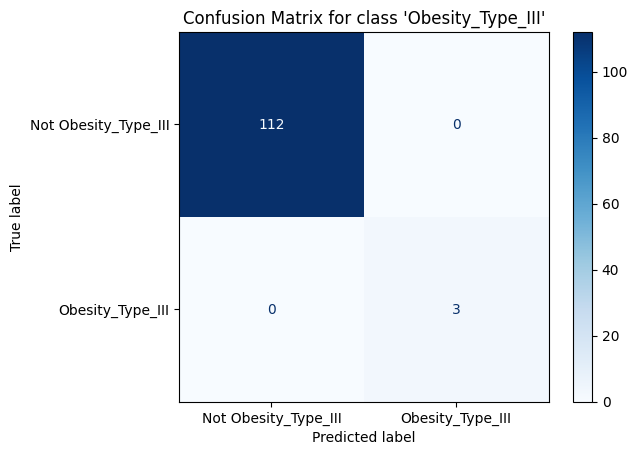

Confusion Matrix for class 'Obesity_Type_III':
[[112   0]
 [  0   3]]
True Positives (TP): 112
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 3
------------------------------
                        precision    recall  f1-score   support

Not Overweight_Level_I       0.94      1.00      0.97       106
    Overweight_Level_I       1.00      0.22      0.36         9

              accuracy                           0.94       115
             macro avg       0.97      0.61      0.67       115
          weighted avg       0.94      0.94      0.92       115



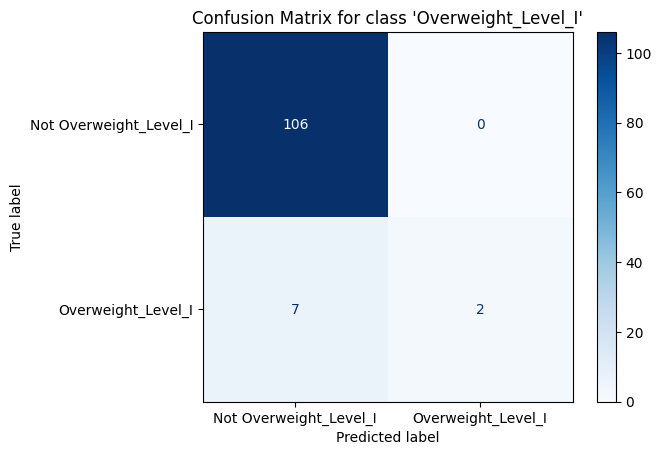

Confusion Matrix for class 'Overweight_Level_I':
[[106   0]
 [  7   2]]
True Positives (TP): 106
False Positives (FP): 0
False Negatives (FN): 7
True Negatives (TN): 2
------------------------------
                         precision    recall  f1-score   support

Not Overweight_Level_II       0.98      0.97      0.98       107
    Overweight_Level_II       0.67      0.75      0.71         8

               accuracy                           0.96       115
              macro avg       0.82      0.86      0.84       115
           weighted avg       0.96      0.96      0.96       115



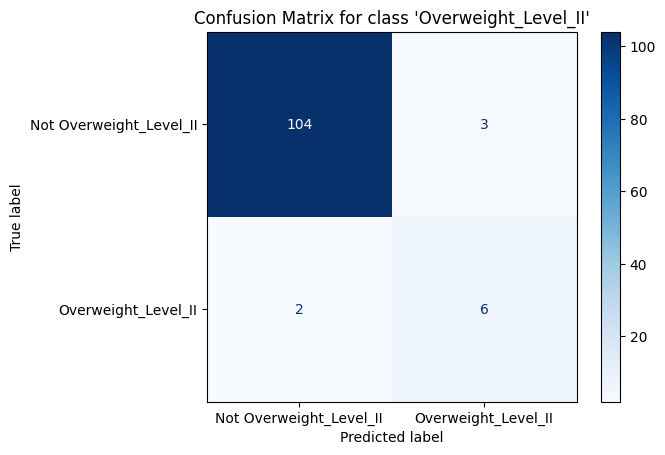

Confusion Matrix for class 'Overweight_Level_II':
[[104   3]
 [  2   6]]
True Positives (TP): 104
False Positives (FP): 3
False Negatives (FN): 2
True Negatives (TN): 6
------------------------------


In [95]:
 from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Unique classes
classes = np.unique(test_y_unblnc)

# Compute and display binary confusion matrix for each class
for target_class in classes:
    # Binarize the true and predicted labels
    y_true_binary = (test_y_unblnc == target_class).astype(int)
    y_pred_binary = (pred_svc_test_unblnc == target_class).astype(int)

    # Compute confusion matrix
    cm = confusion_matrix(y_true_binary, y_pred_binary)

    # Extract metrics
    TP = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TN = cm[1, 1]

    #print classification report for the binary task
    print(classification_report(y_true_binary, y_pred_binary, target_names=[f"Not {target_class}", target_class], zero_division=0))
    print("=" * 50)


        # Display confusion matrix using ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f'Not {target_class}', target_class])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for class '{target_class}'")
    plt.show()

    # Display extracted metrics
    print(f"Confusion Matrix for class '{target_class}':")
    print(cm)
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")
    print("-" * 30)

#Hyper parameter tuning for SVM

In [96]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'degree': [2, 3, 4]
}

# Initialize the SVM model
svc_model_simp_blnc = SVC()

# Set up the grid search
grid_search = GridSearchCV(svc_model_simp_blnc, param_grid, refit=True, verbose=2, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(train_X_blnc, train_y_blnc)

# Print the best parameters and estimator
print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Parameters: {'C': 100, 'degree': 2, 'gamma': 1, 'kernel': 'linear'}
Best Estimator: SVC(C=100, degree=2, gamma=1, kernel='linear')


In [97]:
# Use the best model found
best_svm = grid_search.best_estimator_

In [98]:
# Predicting the model
y_pred_tuned_best_svc_blnc = best_svm.predict(train_X_blnc)

In [99]:
# Print the classification report and accuracy
print(classification_report(train_y_blnc, y_pred_tuned_best_svc_blnc))
print("Train Accuracy of the tuned SVC on balanced dataset:", accuracy_score(train_y_blnc, y_pred_tuned_best_svc_blnc))

                     precision    recall  f1-score   support

Insufficient_Weight       0.99      0.98      0.99       213
      Normal_Weight       0.97      0.98      0.97       229
     Obesity_Type_I       1.00      1.00      1.00       278
    Obesity_Type_II       1.00      1.00      1.00       233
   Obesity_Type_III       1.00      1.00      1.00       265
 Overweight_Level_I       0.94      0.94      0.94       238
Overweight_Level_II       0.95      0.96      0.95       232

           accuracy                           0.98      1688
          macro avg       0.98      0.98      0.98      1688
       weighted avg       0.98      0.98      0.98      1688

Train Accuracy of the tuned SVC on balanced dataset: 0.9798578199052133


Test the tuned SVM model on unbalanced dataset. While testing on the unbalanced dataset. We have not used the test/train split. We have taken the entire unbalanced dataset as our Test dataset.

In [100]:
# Predicting the model
y_pred_tuned_svc_unblnc = best_svm.predict(scaled_x_unblnc)

In [101]:
# Print the classification report and accuracy
print(classification_report(y_unblnc, y_pred_tuned_svc_unblnc))
print("Accuracy of unbalanced data :", accuracy_score(y_unblnc, y_pred_tuned_svc_unblnc))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.98      0.99        42
      Normal_Weight       0.99      0.99      0.99       287
     Obesity_Type_I       1.00      1.00      1.00        23
    Obesity_Type_II       1.00      1.00      1.00       100
   Obesity_Type_III       1.00      1.00      1.00        15
 Overweight_Level_I       0.94      0.94      0.94        52
Overweight_Level_II       0.98      0.98      0.98        52

           accuracy                           0.99       571
          macro avg       0.99      0.98      0.99       571
       weighted avg       0.99      0.99      0.99       571

Accuracy of unbalanced data : 0.9877408056042032


Confusion Matrix for all seven classes using Tuned SVM model.

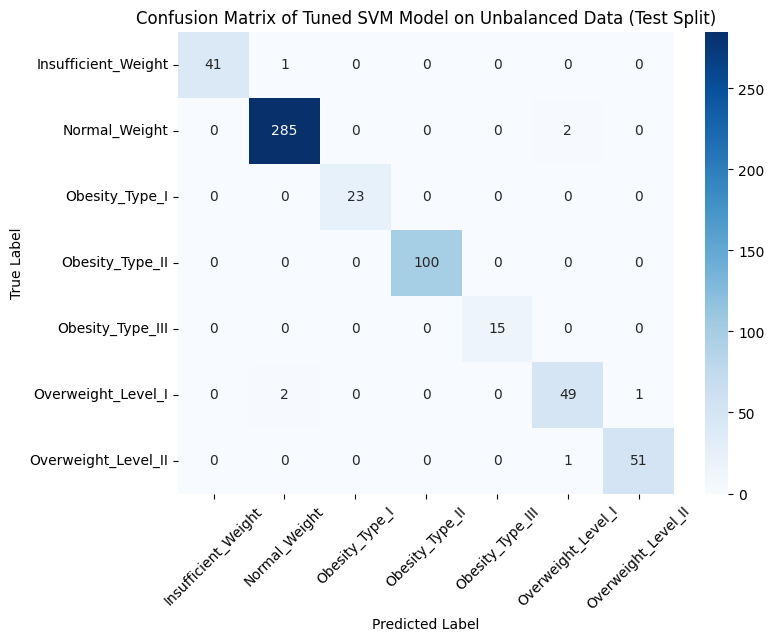

In [102]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the true labels to get the class names
label_encoder.fit(y_unblnc)
class_names = label_encoder.classes_

# y_unblnc are the true labels and y_pred_tuned_svc_unblnc are the predicted labels
result_tuned_svm_blnc = confusion_matrix(y_unblnc, y_pred_tuned_svc_unblnc)

# Create a heatmap with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(result_tuned_svm_blnc, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix of Tuned SVM Model on Unbalanced Data (Test Split)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Position the x-axis labels on the top and rotate for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.show()

Confusion Matrix for each class for Tuned SVM model, which is trained on Balanced dataset and tested on unbalanced dataset.

                         precision    recall  f1-score   support

Not Insufficient_Weight       1.00      1.00      1.00       529
    Insufficient_Weight       1.00      0.98      0.99        42

               accuracy                           1.00       571
              macro avg       1.00      0.99      0.99       571
           weighted avg       1.00      1.00      1.00       571



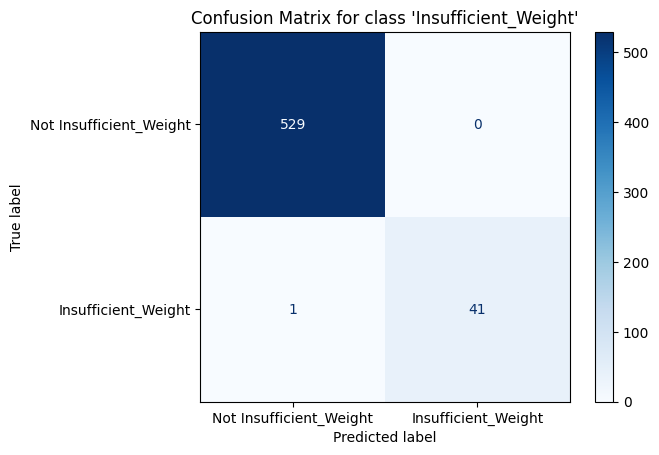

Confusion Matrix for class 'Insufficient_Weight':
[[529   0]
 [  1  41]]
True Positives (TP): 529
False Positives (FP): 0
False Negatives (FN): 1
True Negatives (TN): 41
------------------------------
                   precision    recall  f1-score   support

Not Normal_Weight       0.99      0.99      0.99       284
    Normal_Weight       0.99      0.99      0.99       287

         accuracy                           0.99       571
        macro avg       0.99      0.99      0.99       571
     weighted avg       0.99      0.99      0.99       571



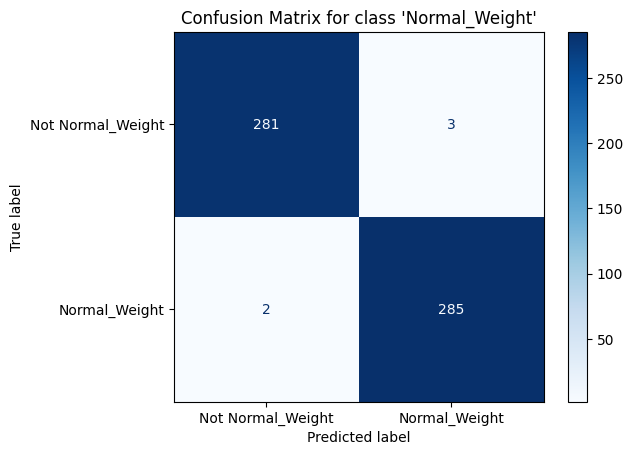

Confusion Matrix for class 'Normal_Weight':
[[281   3]
 [  2 285]]
True Positives (TP): 281
False Positives (FP): 3
False Negatives (FN): 2
True Negatives (TN): 285
------------------------------
                    precision    recall  f1-score   support

Not Obesity_Type_I       1.00      1.00      1.00       548
    Obesity_Type_I       1.00      1.00      1.00        23

          accuracy                           1.00       571
         macro avg       1.00      1.00      1.00       571
      weighted avg       1.00      1.00      1.00       571



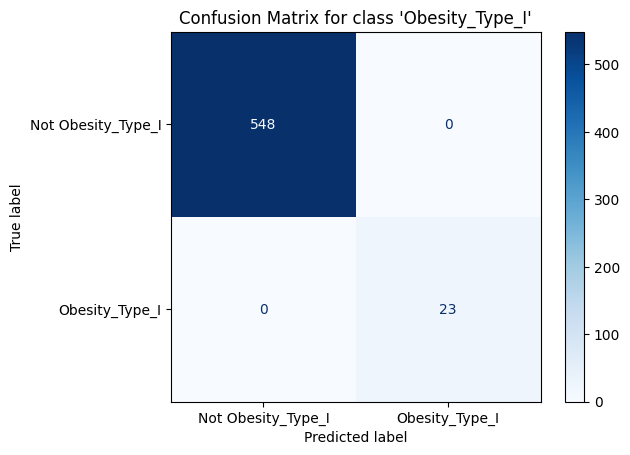

Confusion Matrix for class 'Obesity_Type_I':
[[548   0]
 [  0  23]]
True Positives (TP): 548
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 23
------------------------------
                     precision    recall  f1-score   support

Not Obesity_Type_II       1.00      1.00      1.00       471
    Obesity_Type_II       1.00      1.00      1.00       100

           accuracy                           1.00       571
          macro avg       1.00      1.00      1.00       571
       weighted avg       1.00      1.00      1.00       571



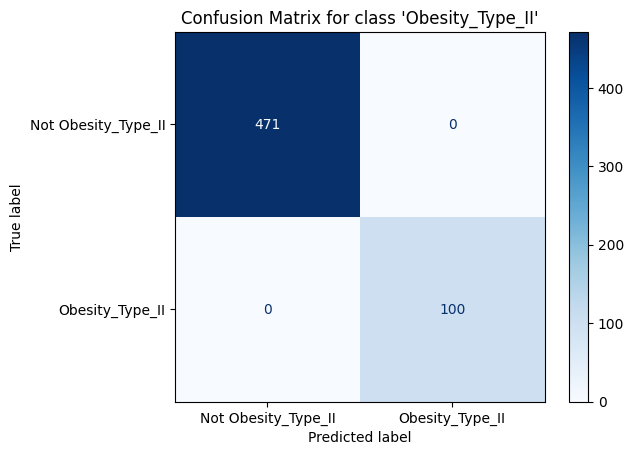

Confusion Matrix for class 'Obesity_Type_II':
[[471   0]
 [  0 100]]
True Positives (TP): 471
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 100
------------------------------
                      precision    recall  f1-score   support

Not Obesity_Type_III       1.00      1.00      1.00       556
    Obesity_Type_III       1.00      1.00      1.00        15

            accuracy                           1.00       571
           macro avg       1.00      1.00      1.00       571
        weighted avg       1.00      1.00      1.00       571



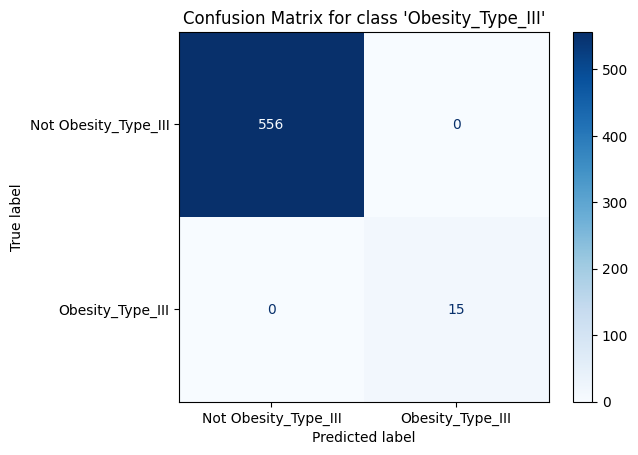

Confusion Matrix for class 'Obesity_Type_III':
[[556   0]
 [  0  15]]
True Positives (TP): 556
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 15
------------------------------
                        precision    recall  f1-score   support

Not Overweight_Level_I       0.99      0.99      0.99       519
    Overweight_Level_I       0.94      0.94      0.94        52

              accuracy                           0.99       571
             macro avg       0.97      0.97      0.97       571
          weighted avg       0.99      0.99      0.99       571



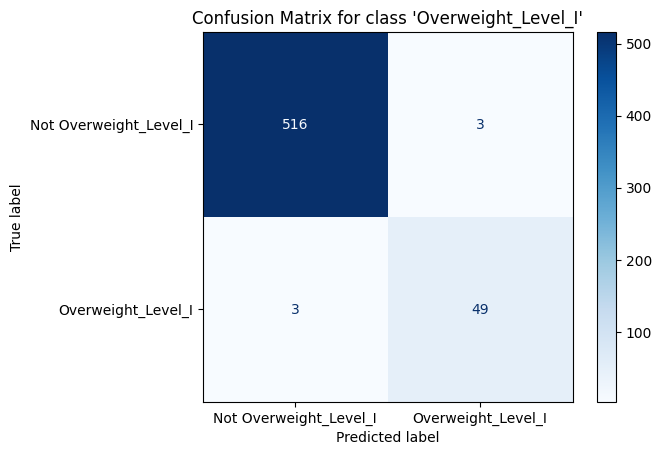

Confusion Matrix for class 'Overweight_Level_I':
[[516   3]
 [  3  49]]
True Positives (TP): 516
False Positives (FP): 3
False Negatives (FN): 3
True Negatives (TN): 49
------------------------------
                         precision    recall  f1-score   support

Not Overweight_Level_II       1.00      1.00      1.00       519
    Overweight_Level_II       0.98      0.98      0.98        52

               accuracy                           1.00       571
              macro avg       0.99      0.99      0.99       571
           weighted avg       1.00      1.00      1.00       571



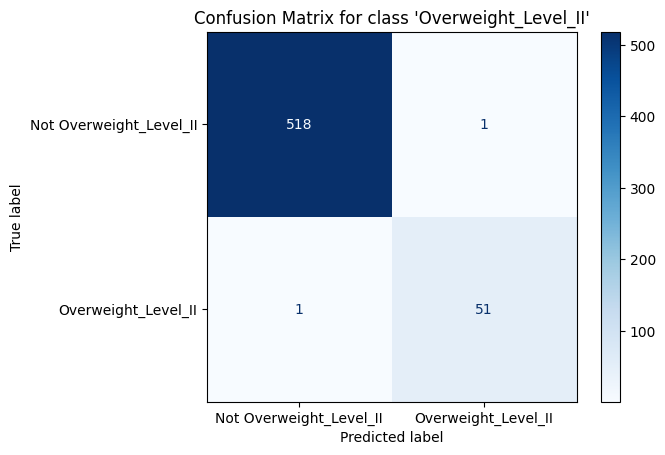

Confusion Matrix for class 'Overweight_Level_II':
[[518   1]
 [  1  51]]
True Positives (TP): 518
False Positives (FP): 1
False Negatives (FN): 1
True Negatives (TN): 51
------------------------------


In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Unique classes
classes = np.unique(y_unblnc)

# Compute and display binary confusion matrix for each class
for target_class in classes:
    # Binarize the true and predicted labels
    y_true_binary = (y_unblnc == target_class).astype(int)
    y_pred_binary = (y_pred_tuned_svc_unblnc == target_class).astype(int)

    # Compute confusion matrix
    cm = confusion_matrix(y_true_binary, y_pred_binary)

    # Extract metrics
    TP = cm[0, 0]  # True Positives
    FP = cm[0, 1]  # False Positives
    FN = cm[1, 0]  # False Negatives
    TN = cm[1, 1]  # True Negatives

    # Print classification report for the binary task
    print(classification_report(y_true_binary, y_pred_binary, target_names=[f"Not {target_class}",target_class], zero_division=0))
    print("=" * 50)

    # Display confusion matrix using ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f'Not {target_class}',target_class])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for class '{target_class}'")
    plt.show()

    # Display extracted metrics
    print(f"Confusion Matrix for class '{target_class}':")
    print(cm)
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")
    print("-" * 30)

#Model 4 - Neural Network

For Neural Network, we have considered Training split for Balanced dataset as the training set; Test split of Balanced dataset as the Validation set ; Entire unbalanced dataset as the Test set.

In [104]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

# Encode target labels for training and testing data
label_encoder = LabelEncoder()
train_y_encoded = label_encoder.fit_transform(train_y_blnc)
val_y_encoded = label_encoder.transform(test_y_blnc)
test_y_encoded_unblnc = label_encoder.transform(y_unblnc)

In [105]:
# One-hot encode the target for training and testing data
train_y_one_hot = to_categorical(train_y_encoded)
val_y_one_hot = to_categorical(val_y_encoded)
test_y_unblnc_one_hot = to_categorical(test_y_encoded_unblnc)

In [106]:
# Correct the number of neurons in the output layer
num_classes = train_y_one_hot.shape[1]

# Build the neural network model
nn_blnc_model = Sequential([
    Dense(128, input_dim=train_X_blnc.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [107]:
# Compile the model
nn_blnc_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [108]:
# Train the model using the one-hot encoded target
history = nn_blnc_model.fit(train_X_blnc, train_y_one_hot, epochs=50, batch_size=10, validation_data=(test_X_blnc, val_y_one_hot))

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4275 - loss: 1.5922 - val_accuracy: 0.6927 - val_loss: 0.8451
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7843 - loss: 0.6865 - val_accuracy: 0.8558 - val_loss: 0.4875
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8744 - loss: 0.4160 - val_accuracy: 0.8913 - val_loss: 0.3398
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9003 - loss: 0.3127 - val_accuracy: 0.9054 - val_loss: 0.2794
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9332 - loss: 0.2310 - val_accuracy: 0.9456 - val_loss: 0.2118
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9503 - loss: 0.1852 - val_accuracy: 0.9433 - val_loss: 0.1800
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9554 - loss: 0.1515 - val_accuracy: 0.9433 - val_loss: 0.1578
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9638 - loss: 0.1258 - val_accuracy: 0.

In [109]:
# Evaluate the model on the test data
test_loss_unblnc, test_accuracy_unblnc = nn_blnc_model.evaluate(scaled_x_unblnc, test_y_unblnc_one_hot)
print(f'Test Loss for Unbalanced data: {test_loss_unblnc}, Test Accuracy for unbalanced data: {test_accuracy_unblnc}')

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9780 - loss: 0.0741 
Test Loss for Unbalanced data: 0.0609329529106617, Test Accuracy for unbalanced data: 0.9807355403900146


# Model 5 - Transformer Model

For Transformer Model, we have taken Balanced data as Train set and the entire unbalanced data as the test set.

In [110]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, accuracy_score

# Define a simple transformer model for tabular data
class SimpleTransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(SimpleTransformerModel, self).__init__()
        self.transformer_layer = nn.TransformerEncoderLayer(d_model=input_dim, nhead=13, dim_feedforward=512)
        self.transformer = nn.TransformerEncoder(self.transformer_layer, num_layers=3)
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        # input shape is (batch_size, seq_len, input_dim)
        x = self.transformer(x)
        x = x.mean(dim=1)
        x = self.fc(x)
        return x

In [111]:
# Convert data to PyTorch tensors
# Convert DataFrames to NumPy arrays first
X_train_np = train_X_blnc.to_numpy()
X_val_np = test_X_blnc.to_numpy()
X_test_np = scaled_x_unblnc.to_numpy()

X_train_tensor = torch.tensor(X_train_np, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(train_y_one_hot, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_np, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_np, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(test_y_unblnc_one_hot, dtype=torch.long)

Test and train dataset for unbalanced data

In [112]:
# Create DataLoader for training and testing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [113]:
# Initialize the model, loss function, and optimizer
input_dim = X_train_np.shape[1]
num_classes = len(label_encoder.classes_)
model = SimpleTransformerModel(input_dim=input_dim, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [114]:
# Train the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        batch_y_float = batch_y.float()
        loss = criterion(outputs, batch_y_float)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

Epoch 1/20, Loss: 1.3735
Epoch 2/20, Loss: 0.9956
Epoch 3/20, Loss: 0.6231
Epoch 4/20, Loss: 0.7936
Epoch 5/20, Loss: 0.6436
Epoch 6/20, Loss: 0.4827
Epoch 7/20, Loss: 0.3391
Epoch 8/20, Loss: 0.2329
Epoch 9/20, Loss: 0.2473
Epoch 10/20, Loss: 0.2793
Epoch 11/20, Loss: 0.2575
Epoch 12/20, Loss: 0.2305
Epoch 13/20, Loss: 0.1259
Epoch 14/20, Loss: 0.2686
Epoch 15/20, Loss: 0.2262
Epoch 16/20, Loss: 0.1173
Epoch 17/20, Loss: 0.1410
Epoch 18/20, Loss: 0.0332
Epoch 19/20, Loss: 0.1357
Epoch 20/20, Loss: 0.0528


In [115]:
# Evaluate the model on training set
model.eval()
with torch.no_grad():
    train_outputs = model(X_train_tensor)
    _, predicted = torch.max(train_outputs, 1)
    print("Size of predicted tensor:", predicted.size())

    # Convert y_test_tensor to multiclass format
    if y_train_tensor.ndim > 1:
        y_train_tensor = torch.argmax(y_train_tensor, dim=1)

Size of predicted tensor: torch.Size([1688])


In [116]:
  accuracy = accuracy_score(y_train_tensor.cpu(), predicted.cpu())
  print("Train Accuracy:", accuracy)
  print(classification_report(y_train_tensor.cpu(), predicted.cpu(), target_names=label_encoder.classes_))

Train Accuracy: 0.9727488151658767
                     precision    recall  f1-score   support

Insufficient_Weight       0.91      1.00      0.96       213
      Normal_Weight       0.96      0.91      0.93       229
     Obesity_Type_I       0.98      0.99      0.99       278
    Obesity_Type_II       1.00      1.00      1.00       233
   Obesity_Type_III       1.00      1.00      1.00       265
 Overweight_Level_I       0.98      0.95      0.96       238
Overweight_Level_II       0.98      0.96      0.97       232

           accuracy                           0.97      1688
          macro avg       0.97      0.97      0.97      1688
       weighted avg       0.97      0.97      0.97      1688



In [117]:
# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs, 1)
    print("Size of predicted tensor:", predicted.size())

    # Convert y_test_tensor to multiclass format if needed
    if y_test_tensor.ndim > 1:
        y_test_tensor = torch.argmax(y_test_tensor, dim=1)

Size of predicted tensor: torch.Size([571])


In [118]:
    accuracy = accuracy_score(y_test_tensor.cpu(), predicted.cpu())
    print("Test Accuracy:", accuracy)
    print(classification_report(y_test_tensor.cpu(), predicted.cpu(), target_names=label_encoder.classes_))

Test Accuracy: 0.8949211908931699
                     precision    recall  f1-score   support

Insufficient_Weight       0.51      1.00      0.68        42
      Normal_Weight       0.99      0.82      0.89       287
     Obesity_Type_I       1.00      1.00      1.00        23
    Obesity_Type_II       1.00      1.00      1.00       100
   Obesity_Type_III       1.00      1.00      1.00        15
 Overweight_Level_I       0.76      0.92      0.83        52
Overweight_Level_II       0.96      0.94      0.95        52

           accuracy                           0.89       571
          macro avg       0.89      0.95      0.91       571
       weighted avg       0.93      0.89      0.90       571

